In [1]:
import netCDF4 as nc

import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
import xarray as xr

from scipy import signal
import scipy

In [2]:
path = '/Users/zcaspar/codes/Diagnostics/'

### T=20d : Correlation functions for different part of the total signal removed (linear trend, average field (1d and 2), both)

### Lagrangian

In [19]:
corrL = {}
removed = ['trend','avg1d + trend','avg1d','avg2d','total']
for name,data in zip(removed,
                     ['Lcorr_20.nc','drifters_corr_20avg1dd_ZC.nc','drifters_corr20_ZC.nc',
                      'drifters_corr_20avg2d_ZC.nc','drifters_corr_20total_ZC.nc']):
    corrL[name] = xr.open_dataset(path+data)
    for v in ['uu', 'vv']:
        corrL[name][v+'_normalized'] = corrL[name][v]/corrL[name][v].sel(lag=0)
    for v in ['uv', 'vu']:
        corrL[name][v+'_normalized'] = corrL[name][v]/np.sqrt(corrL[name]['uu'].sel(lag=0)*corrL[name]['vv'].sel(lag=0))

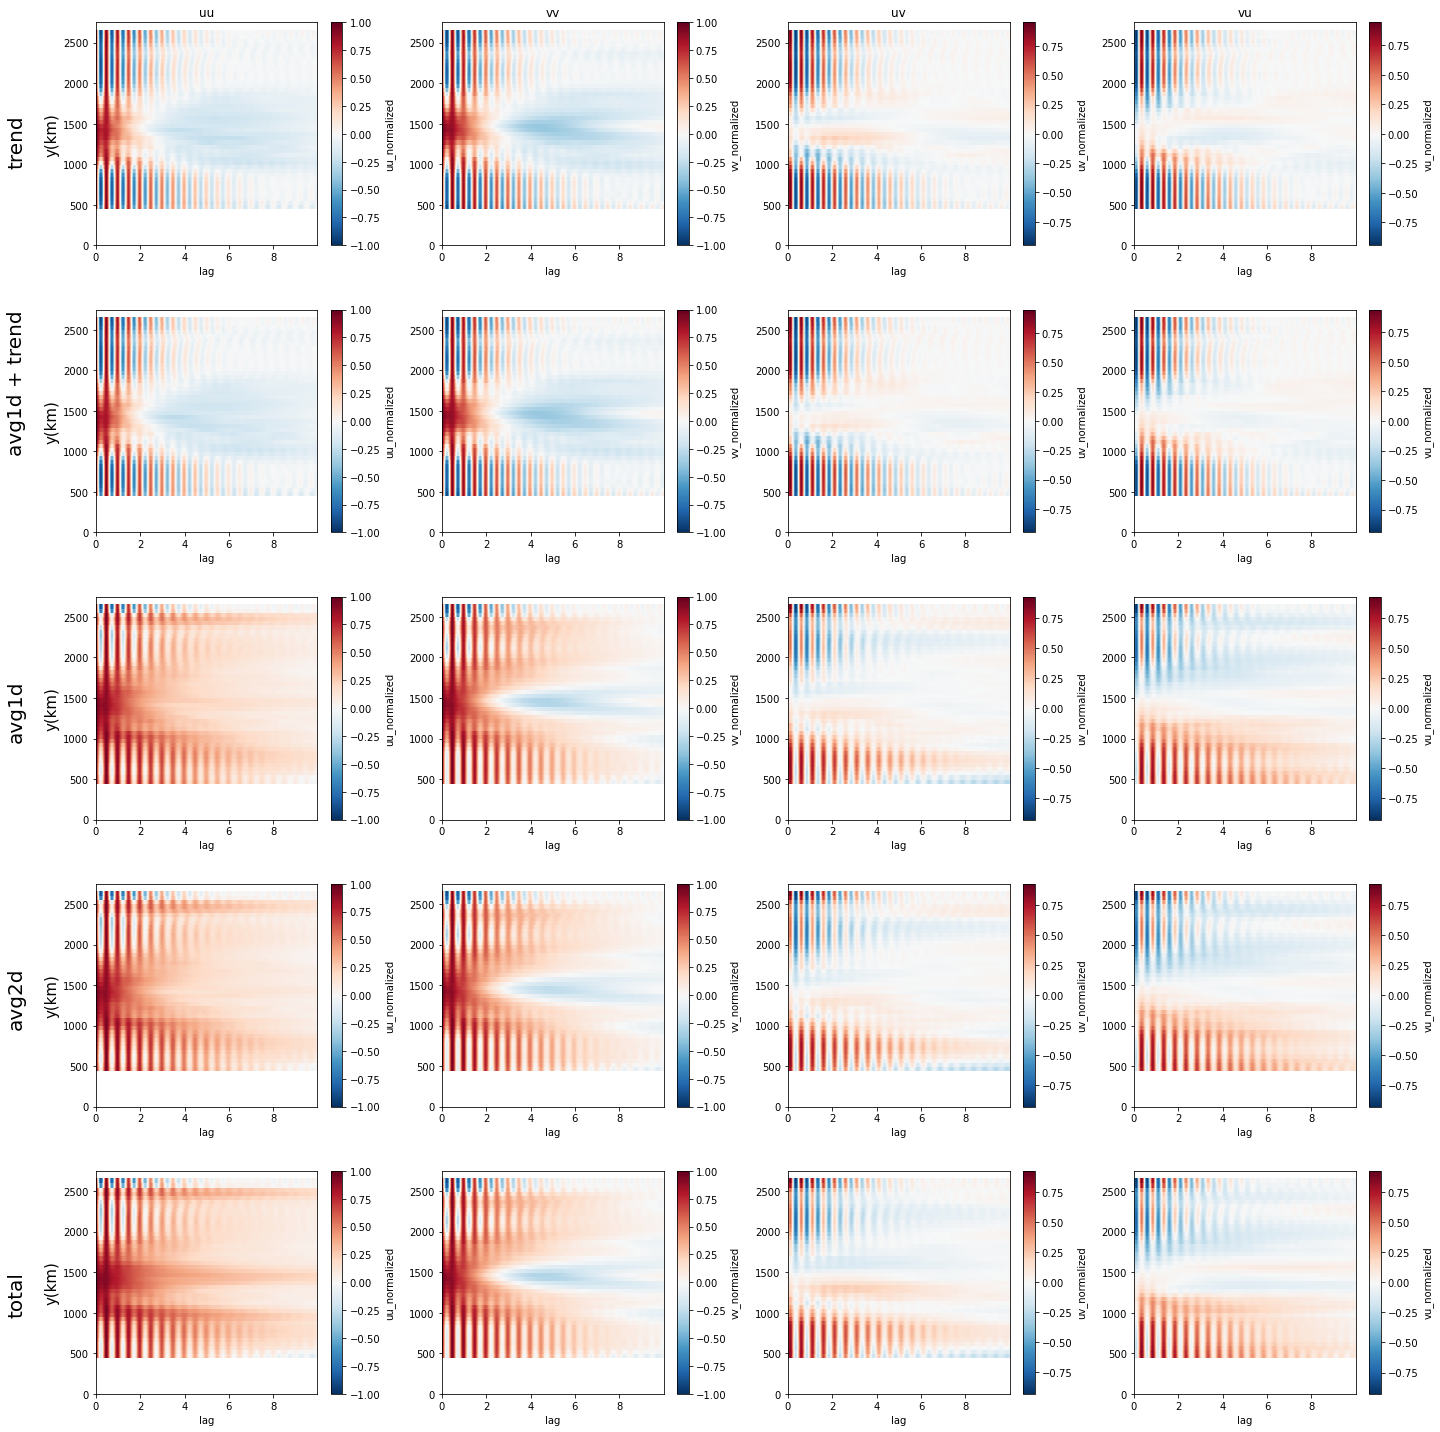

In [20]:
fig,axs = plt.subplots(len(removed),4,figsize=(20,20))
for i,name in enumerate(removed):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corrL[name][V+'_normalized'].plot(ax=ax);ax.set_ylabel('')
    axs[i,0].text(-4,1000,name,fontsize=20,rotation=90);axs[i,0].set_ylabel('y(km)',fontsize=15)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

#### Comments:
The negative lobe observed for the autocorrelation of u seems to be caused by the detrending since it is not observed when only an averaged field is removed to the signal nor in the total case (nothing removed).\
For v, the area where a negative lobe is narrower in the case where nothing or only the average was removed.\
The slow component is more marked for the  average field. As expected, the detrending (for small time windows) seems to destroy a lot of the slow motions.\
The correlation functions computed from the total signal present more differences for u, for which we see a slower decay for large lags in the mid domain and around 2500km and 1000km than in the case of a removed average. Those parts
of the signal were 'killed' by the detrending.\
No visually noticeable differences between the removal of the 1d  and the 2d averages are observed. 

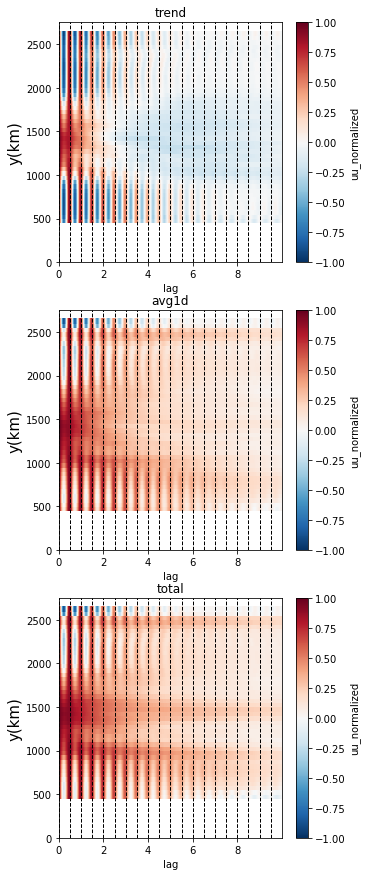

In [21]:
# Frequency shift in u, zoom : 
fig,axs = plt.subplots(3,1,figsize=(5,15))
for V,ax in zip(['trend','avg1d','total'],axs):
    corrL[V]['uu_normalized'].plot(ax=ax);ax.set_ylabel('')
    [ax.axvline(x,linestyle='--',color='k',linewidth=1) for x in np.arange(0,10,0.5)]
    ax.set_title(V);ax.set_ylabel('y(km)',fontsize=15)

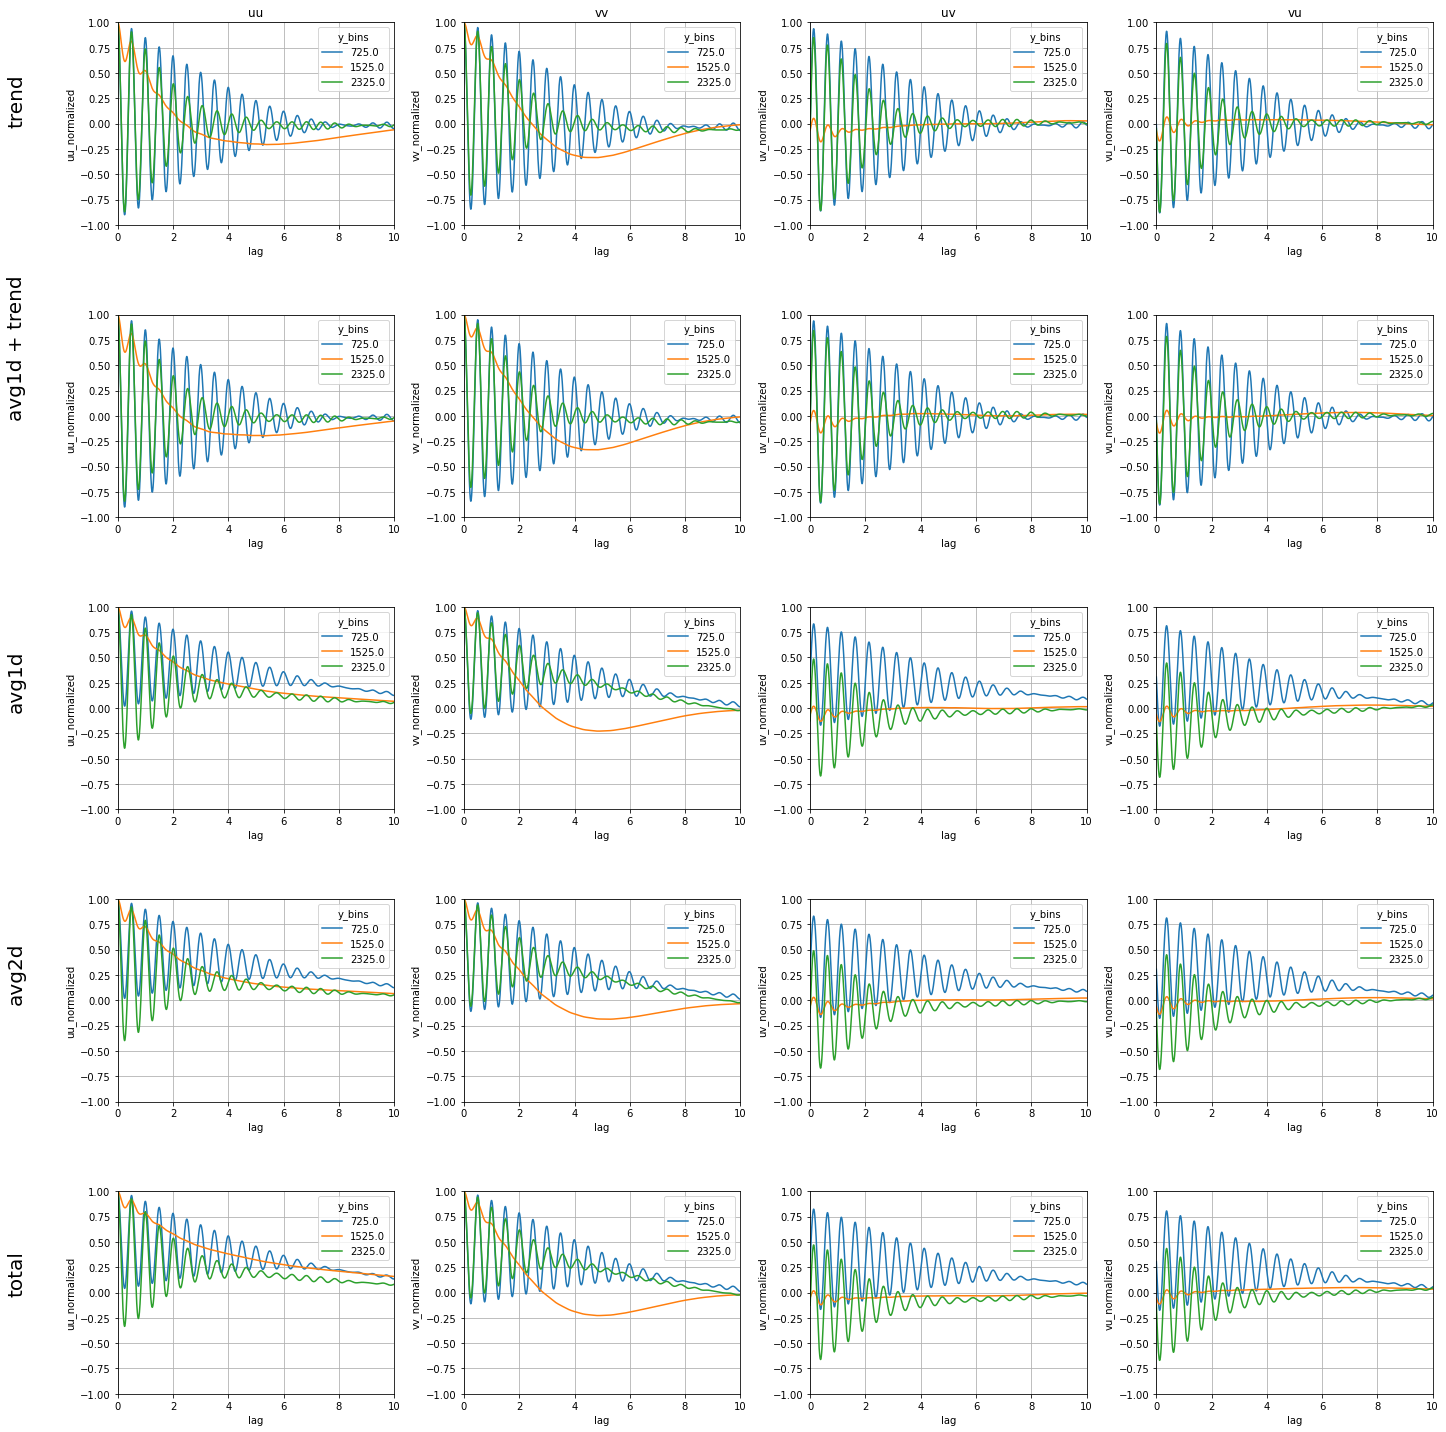

In [22]:
#Sections
Y=[700,1500,2300]
fig,axs = plt.subplots(len(removed),4,figsize=(20,20))
for i,name in enumerate(removed):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corrL[name][V+'_normalized'].sel(y_bins=Y,method='nearest').plot(ax=ax, x='lag', hue='y_bins')
        ax.set_xlim(0,10);ax.set_ylim(-1,1);ax.grid()
    axs[i,0].text(-4,0,name,fontsize=20,rotation=90)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

### Comments :
With detrending (1st 2 lines) : \
uu (in the jet) : negative lobe (min$\simeq$-0.2), sharp marks of fast motion for small lags ($\tau$<2)\
vv (in the jet) : same than for uu, with negative lobe more marked (min$\simeq$-0."3)\
uv and vu : cross correlation close to 0 in the jet

Only average removed (last 2 lines) : \
No visible differences btw 2d and 1d (to be confirmed)\
uu in the jet : no negative lobe, fast ocillations less marked than in the case of detrending\
vv in the jet : negative lobe but less marked than in the previous case (min$\simeq$-0.2)\
uv an vu : close to 0 in the jet; south and north of the domain, oscillations have smaller amplitudes than in the detrending case\
In all correlations, we observe nodes North and South of the domain while it is seen only south in the detrending case.

Overall, the most significant differences when changing from a detrending to the removal of an average field are the loss of a negative lobe in the autocorrelation of u and the decrease of the amplitudes of the fast oscillations in all correlation functions.

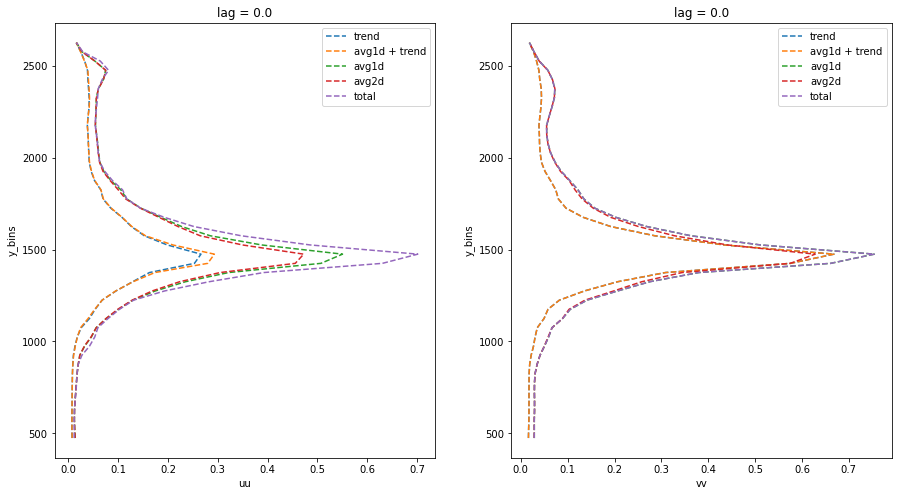

In [23]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
for V,ax in zip(['uu','vv'],axs):
    for name in removed:
        corrL[name][V].sel(lag=0).plot.line('--',ax=ax,y='y_bins',label=name)
    ax.legend()

### Eulerian

In [24]:
corrE = {}
removed = ['trend','avg1d + trend','avg1d','avg2d','total']
for name,data in zip(removed,
                     ['Eulerian_corr_20d_ZC.nc','Eulerian_corr_20avg1dd_ZC.nc','Eulerian_corr_20avg1d_ZC.nc',
                      'Eulerian_corr_20avg2d_ZC.nc','Eulerian_corr_20total_ZC.nc']):
    corrE[name] = xr.open_dataset(path+data)
    for v in ['uu', 'vv']:
        corrE[name][v+'_normalized'] = corrE[name][v]/corrE[name][v].sel(lags=0)
    for v in ['uv', 'vu']:
        corrE[name][v+'_normalized'] = corrE[name][v]/np.sqrt(corrE[name]['uu'].sel(lags=0)*corrE[name]['vv'].sel(lags=0))

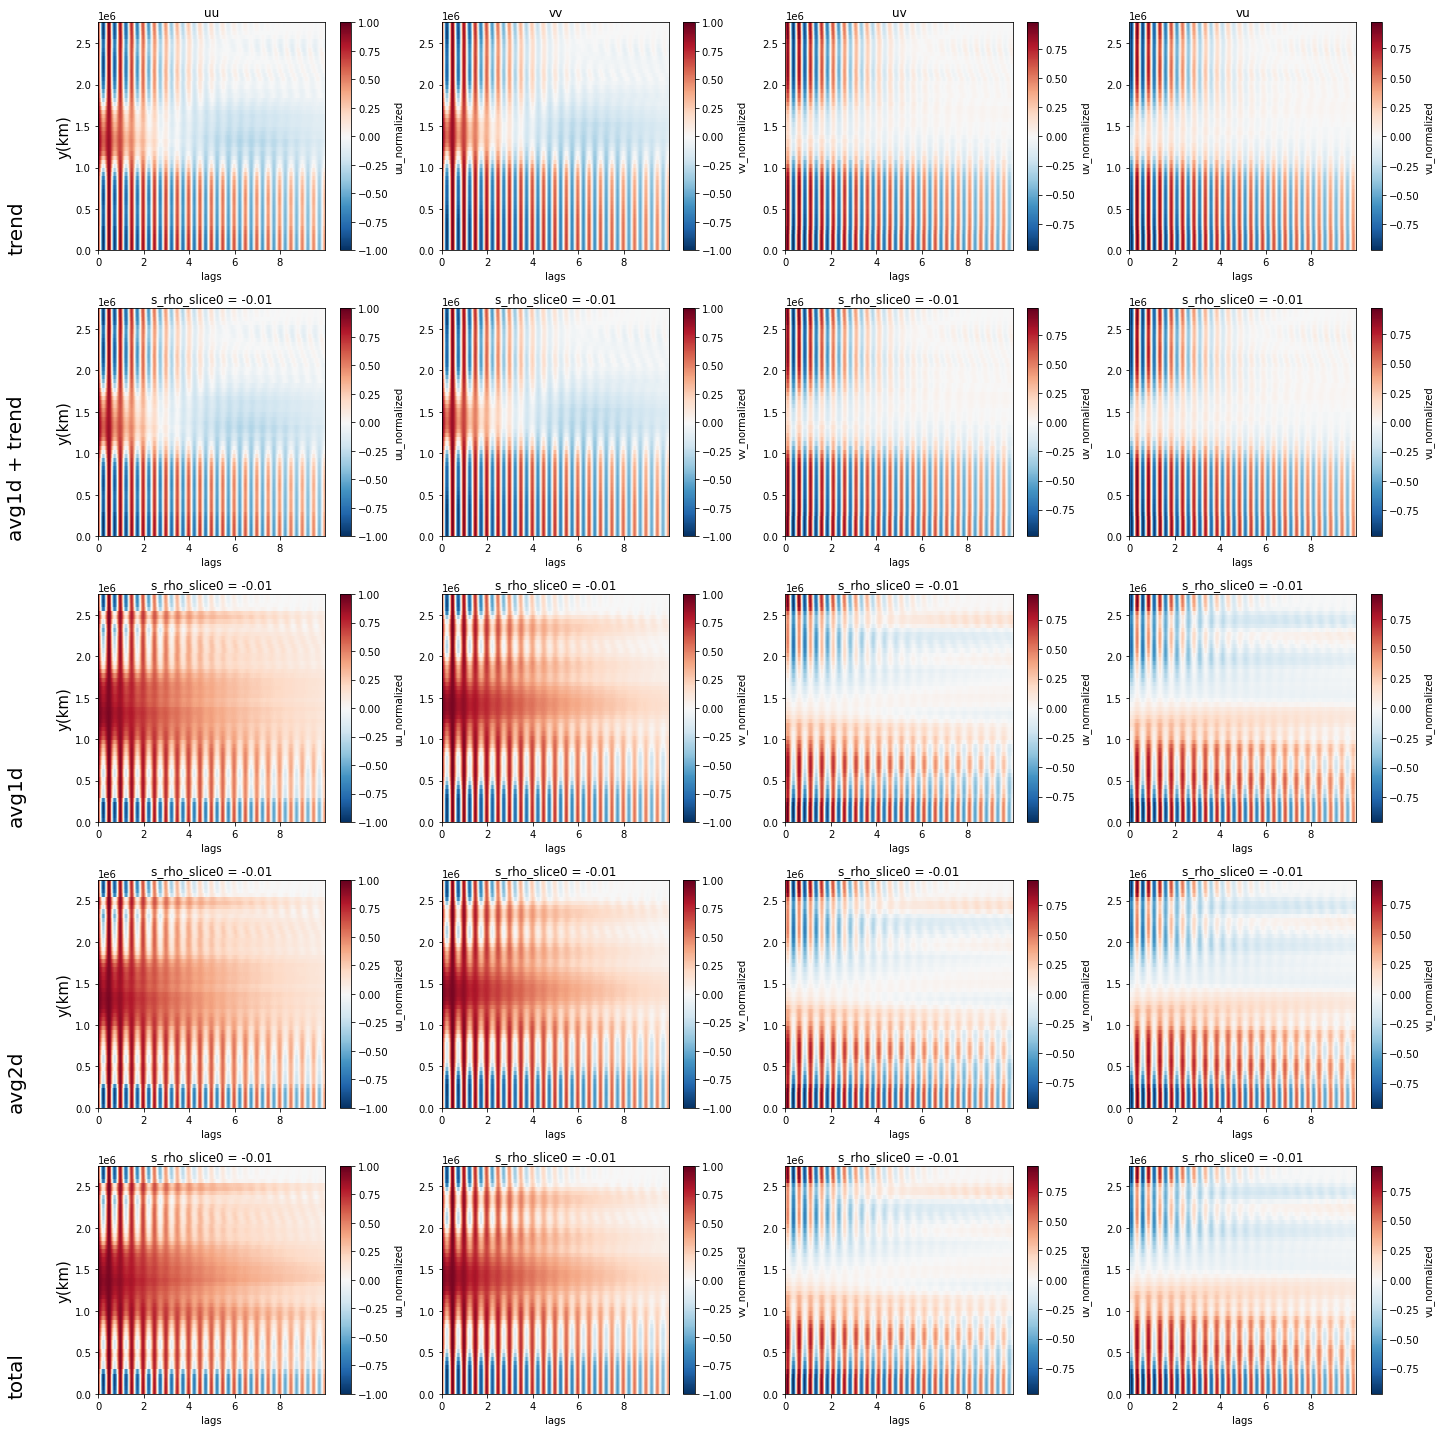

In [11]:
fig,axs = plt.subplots(len(removed),4,figsize=(20,20))
for i,name in enumerate(removed):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corrE[name][V+'_normalized'].plot(ax=ax);ax.set_ylabel('')
    axs[i,0].text(-4,1000,name,fontsize=20,rotation=90);axs[i,0].set_ylabel('y(km)',fontsize=15)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

#### Comments. :
Detrended (lines 1 and 2): Almost no differences between uu and vv. Negative lobe in both cases\
Avg removed (line 3 and 4): Non differences btw 2d and 1d. Slower decay in the jet for vv 

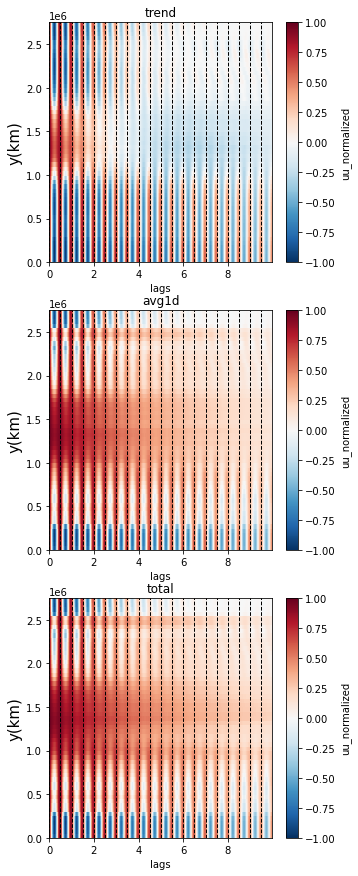

In [12]:
# Frequency shift in u, zoom : 
fig,axs = plt.subplots(3,1,figsize=(5,15))
for V,ax in zip(['trend','avg1d','total'],axs):
    corrE[V]['uu_normalized'].plot(ax=ax);ax.set_ylabel('')
    [ax.axvline(x,linestyle='--',color='k',linewidth=1) for x in np.arange(0,10,0.5)]
    ax.set_title(V);ax.set_ylabel('y(km)',fontsize=15)

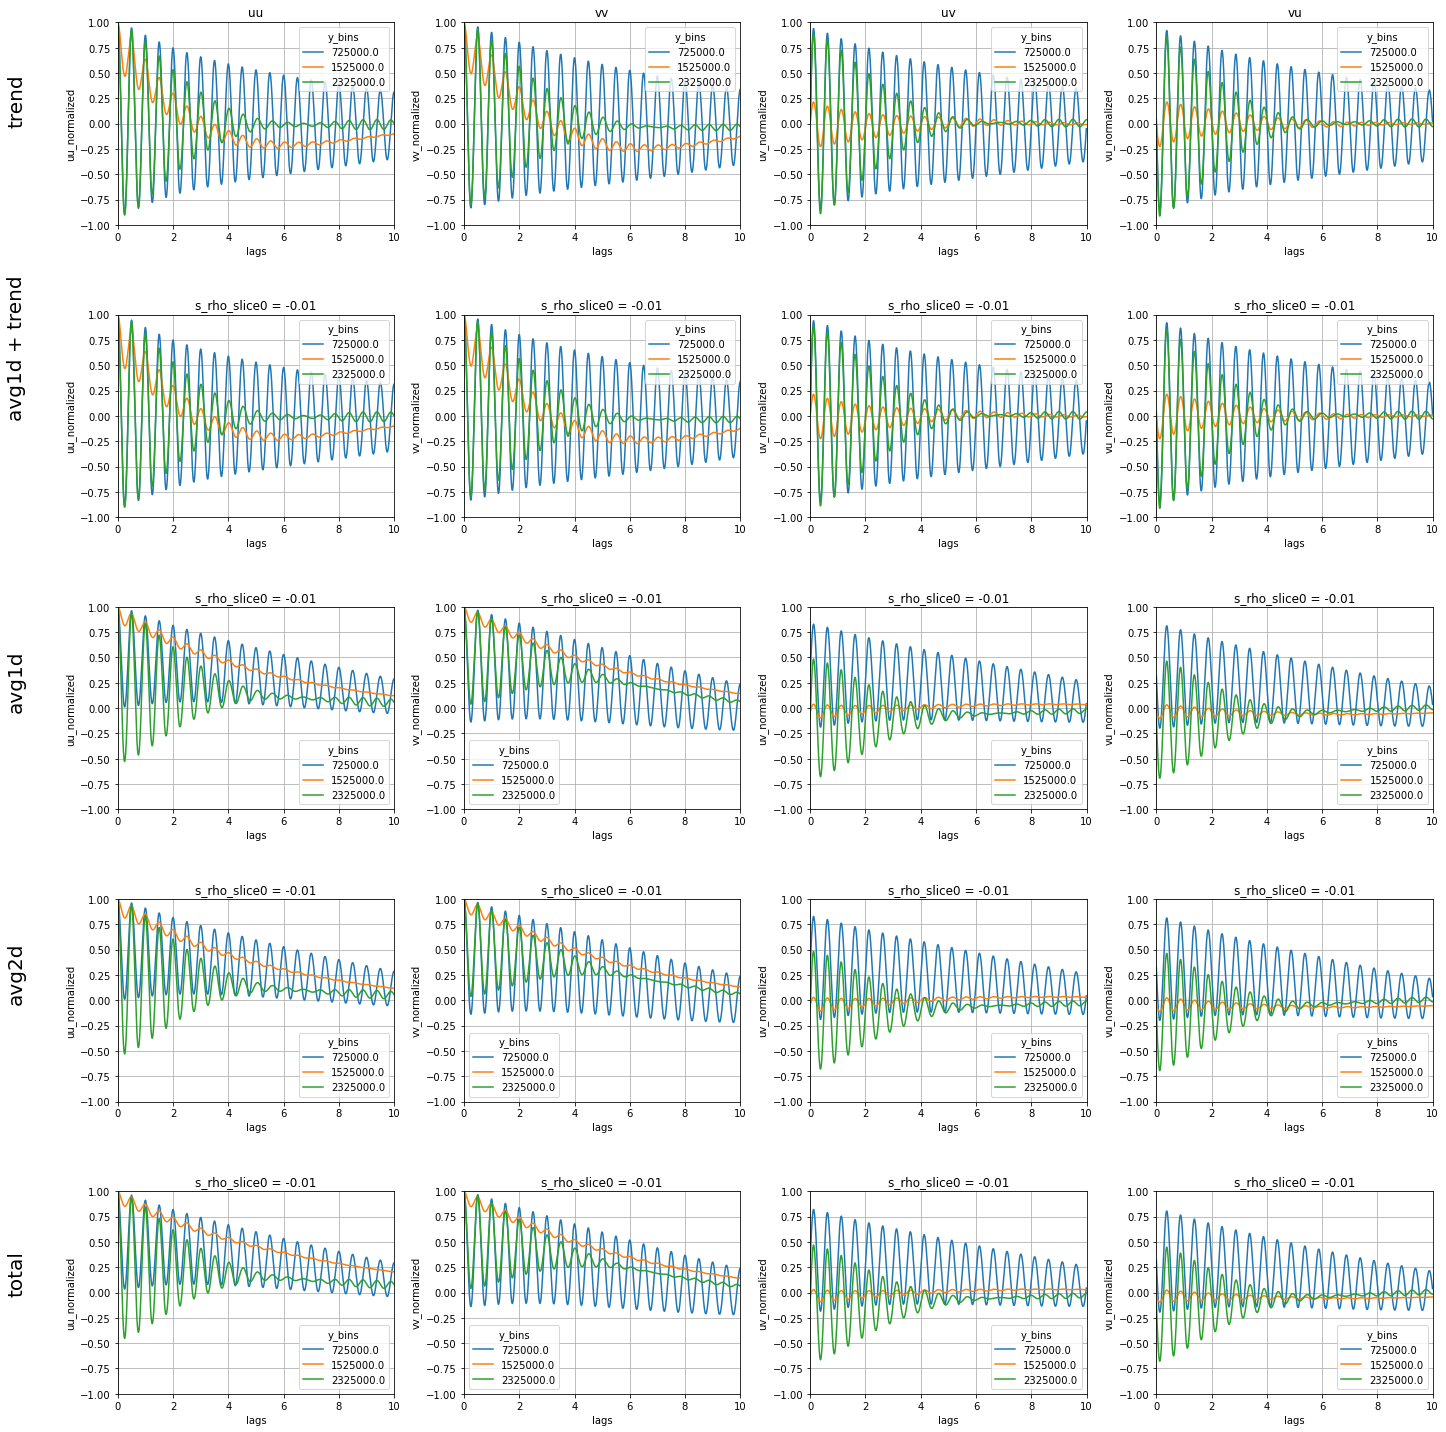

In [16]:
#Sections
Y=[700*1e3,1500*1e3,2300*1e3]
fig,axs = plt.subplots(len(removed),4,figsize=(20,20))
for i,name in enumerate(removed):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corrE[name][V+'_normalized'].sel(y_bins=Y,method='nearest').plot(ax=ax, x='lags', hue='y_bins')
        ax.set_xlim(0,10);ax.set_ylim(-1,1);ax.grid()
    axs[i,0].text(-4,0,name,fontsize=20,rotation=90)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

### Comments : 
With detrending (1st 2 lines) : \
uu (in the jet) : negative lobe (min$\simeq$-0.25), progressive decay of fast motion with $\tau$\
vv (in the jet) : same than for uu, with negative lobe that seems slightly more marked\
uv and vu : cross correlation close to 0 in the jet
uu (outside the jet) : Node in the Northern area, slow decay in the south (amplitude/2 in 10days)\
vv (outside the jet) : Node in the Northern area, slow decay in the south (amplitude/2 in 10days), slower than the one observed for uu

Only average removed (last 2 lines) : \
No visible differences btw 2d and 1d \
uu in the jet : no negative lobe, fast ocillations less marked than in the case of detrending\
vv in the jet : same observations than for uu\
uv an vu : close to 0 in the jet; south and north of the domain, oscillations have smaller amplitudes than in the detrending case\

Last line, total signal : Very similar to the cases with only the average removed. There seem to be a change of slope in the jet.

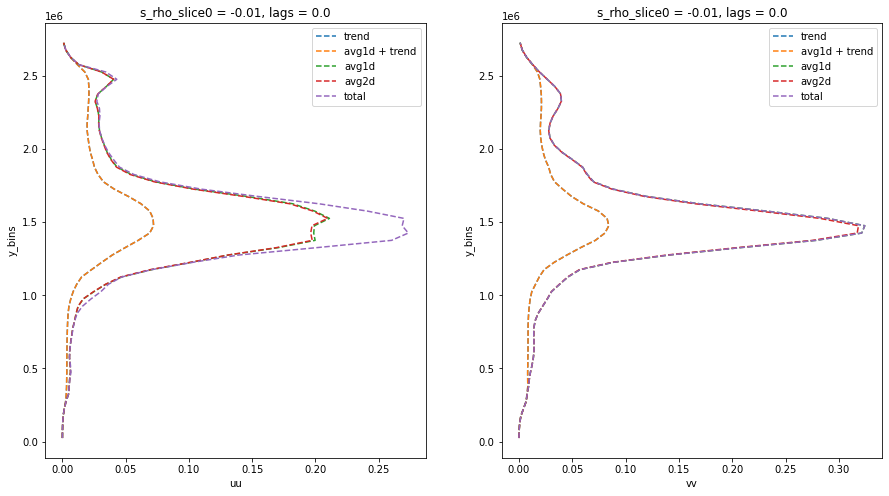

In [18]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
for V,ax in zip(['uu','vv'],axs):
    for name in removed:
        corrE[name][V].sel(lags=0).plot.line('--',ax=ax,y='y_bins',label=name)
    ax.legend()

### Comparaison lagrangian/eulerian :  detrended, 1d average removed and total cases 

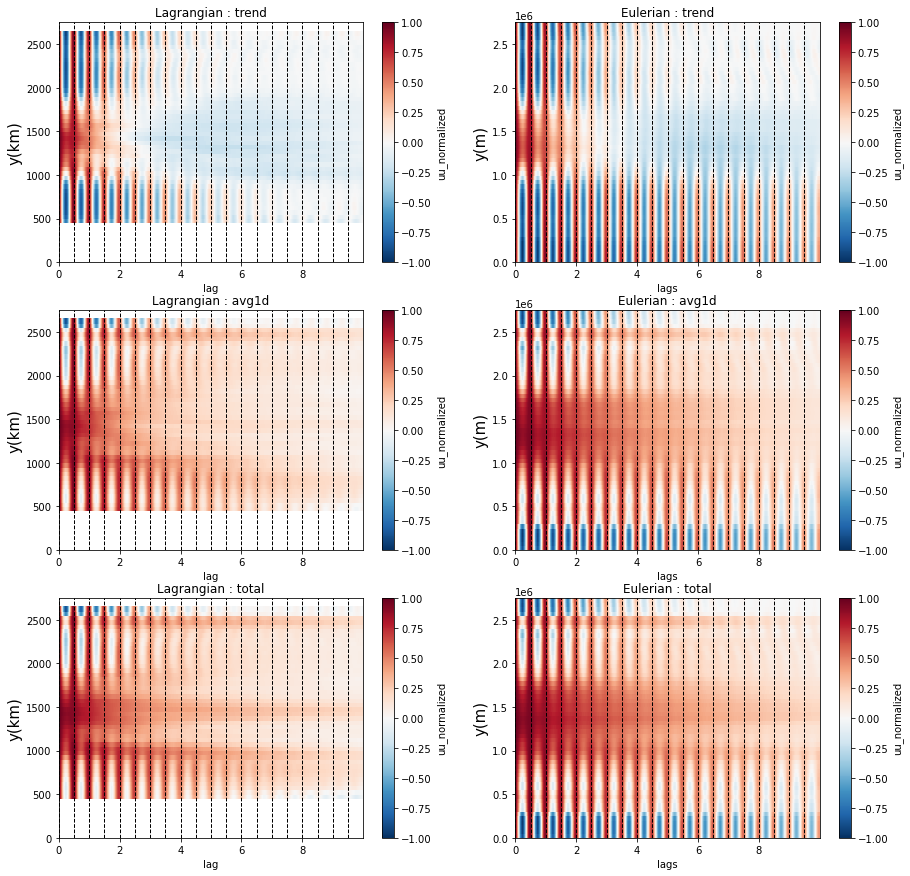

In [29]:
fig,ax = plt.subplots(3,2,figsize=(15,15))
for V,i in zip(['trend','avg1d','total'],range(3)):
    corrL[V]['uu_normalized'].plot(ax=ax[i,0]);ax[i,0].set_ylabel('')
    corrE[V]['uu_normalized'].plot(ax=ax[i,1]);ax[i,1].set_ylabel('')
    [ax[i,0].axvline(x,linestyle='--',color='k',linewidth=1) for x in np.arange(0,10,0.5)]
    ax[i,0].set_title('Lagrangian : '+V);ax[i,0].set_ylabel('y(km)',fontsize=15)
    [ax[i,1].axvline(x,linestyle='--',color='k',linewidth=1) for x in np.arange(0,10,0.5)]
    ax[i,1].set_title('Eulerian : '+V);ax[i,1].set_ylabel('y(m)',fontsize=15)

### Comments : 
Detrending : Fast oscillations decay slowlier in the eulerian case, the negative lobe is also stronger in the jet\
Avg : Slowier exponential decay in the jet and fast oscillation are still more marked in the eulerian case\
Total : Similar to the avg case. Area of fast decay in the southern part near the jet in lagrangian and eulerian case (still slowier in the eulerian one)

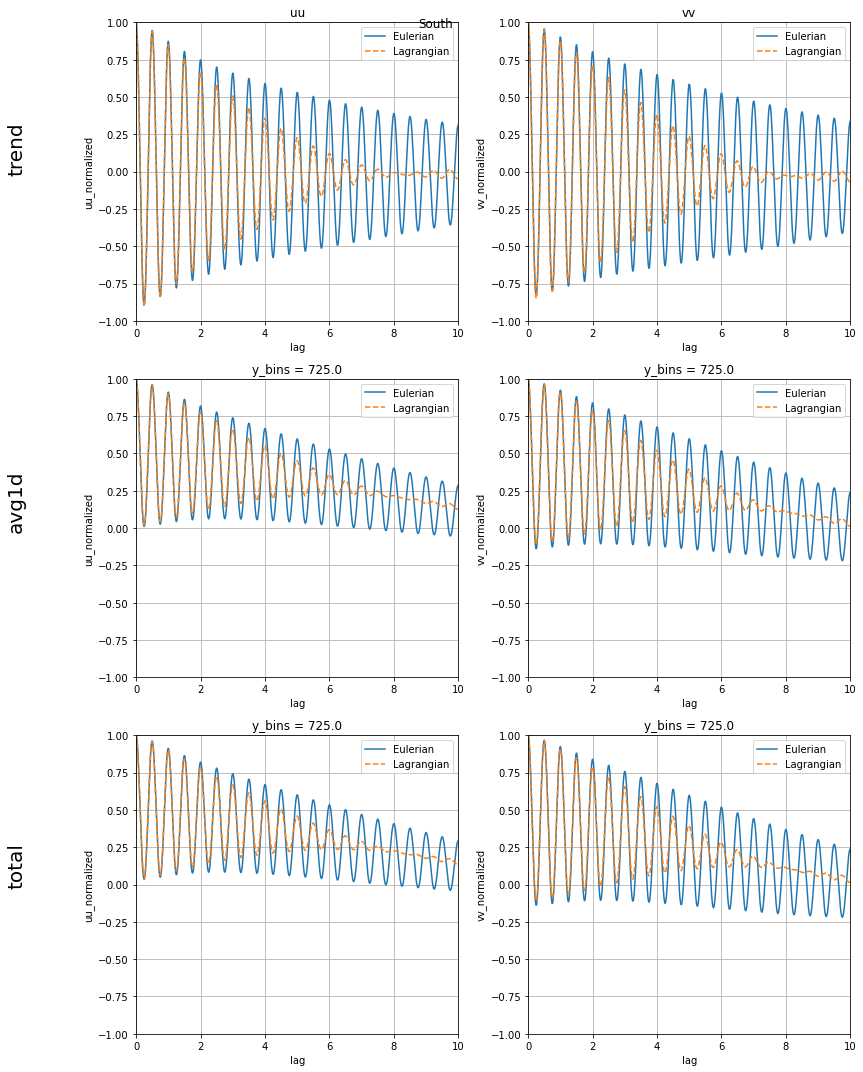

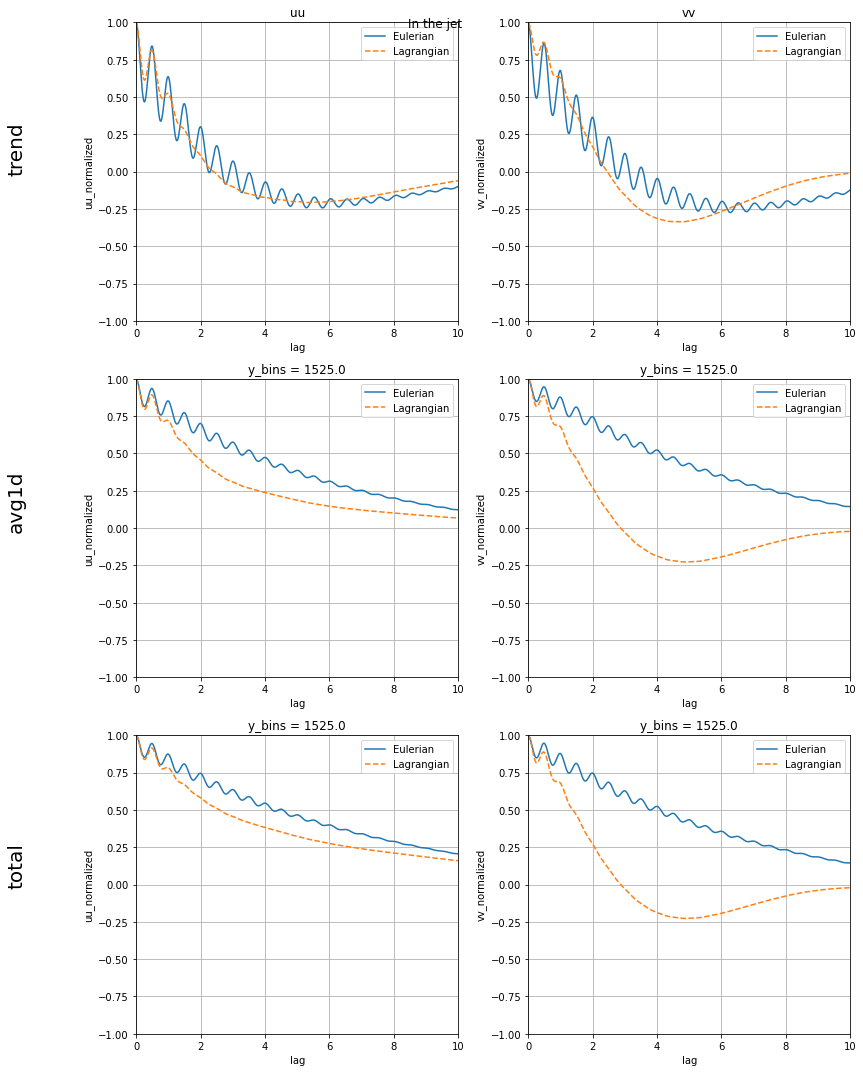

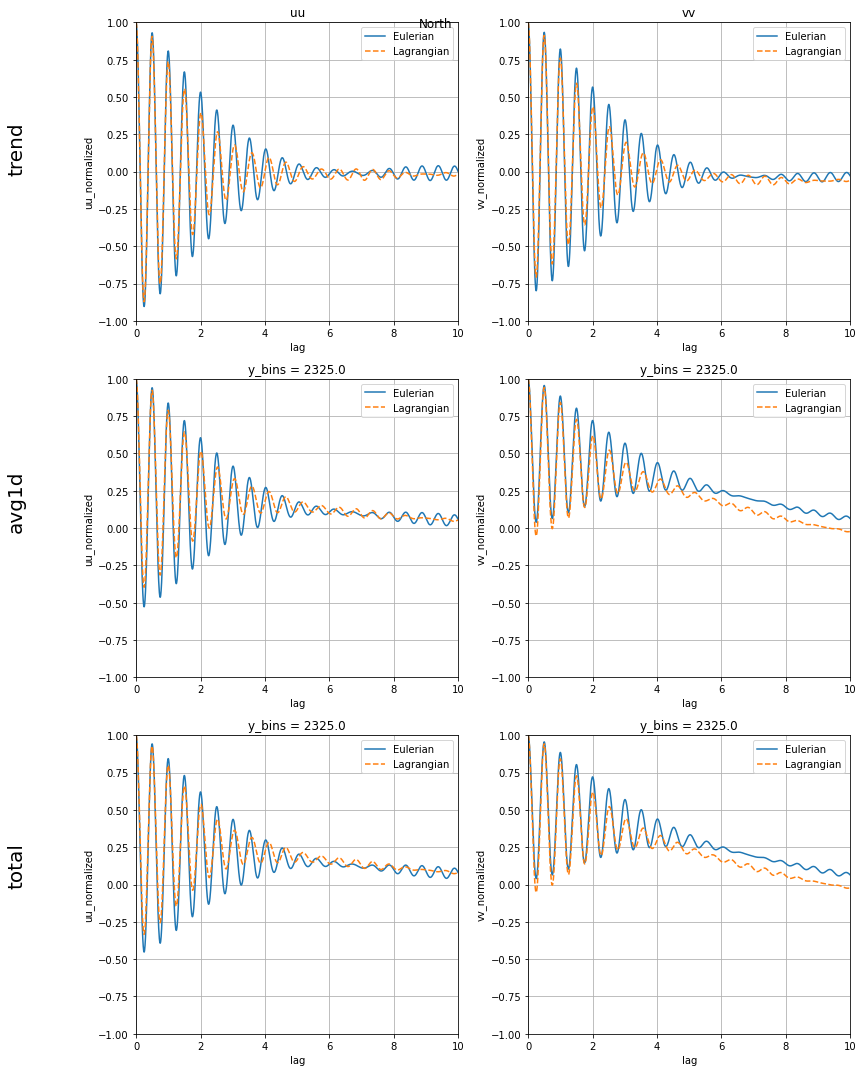

In [44]:
#Sections
Y=[700*1e3,1500*1e3,2300*1e3]
for y,title in zip(Y,['South','In the jet','North']):
    fig,axs = plt.subplots(len(removed[::2]),2,figsize=(12,15))
    for i,name in enumerate(removed[::2]):
        for V,ax in zip(['uu','vv'],axs[i,:]):
            corrE[name][V+'_normalized'].sel(y_bins=y,method='nearest').plot(ax=ax,label=('Eulerian'))
            corrL[name][V+'_normalized'].sel(y_bins=y*1e-3,method='nearest').plot(linestyle='--',ax=ax,label=('Lagrangian'))
            ax.set_xlim(0,10);ax.set_ylim(-1,1);ax.grid();ax.legend()
        axs[i,0].text(-4,0,name,fontsize=20,rotation=90)
    axs[0,0].set_title('uu');axs[0,1].set_title('vv')#;axs[0,2].set_title('uv');axs[0,3].set_title('vu')
    fig.tight_layout();fig.suptitle(title)


### Comments : 
South : In the three cases the main difference is the node in the lagrangian correlation and its faster decay\
North : Their a shift in frequency on the lagrangian case where ther is a node in the eulerian one.\
In the jet :  this is where the largest differences are observed which was expected in some extent. For the fast oscillations their decay is slowlier in the eulerian case. However the biggest difference is in the main feature in the lagrangian correlations, the negative lobe. In the lagrangian case, the negative lobe in uu is only visible in the detrending case but remain for the two others in vv. For the eulerian autocorrelation, the negative lobe in both uu and vv is only observed in the detrended case and completely erased for the other cases.

### Impact of the time window : detrending vs average field

In [45]:
corrLT = {}
for name,data in zip(['trend20','trend80','avg20','avg80','tot20','tot80'],
                     ['Lcorr_20.nc','Lcorr_80','drifters_corr20_ZC.nc','drifters_corr_80avg1d_ZC.nc',
                      'drifters_corr_20total_ZC.nc','drifters_corr_80total_ZC.nc']):
    corrLT[name] = xr.open_dataset(path+data)
    for v in ['uu', 'vv']:
        corrLT[name][v+'_normalized'] = corrLT[name][v]/corrLT[name][v].sel(lag=0)
    for v in ['uv', 'vu']:
        corrLT[name][v+'_normalized'] = corrLT[name][v]/np.sqrt(corrLT[name]['uu'].sel(lag=0)*corrLT[name]['vv'].sel(lag=0))

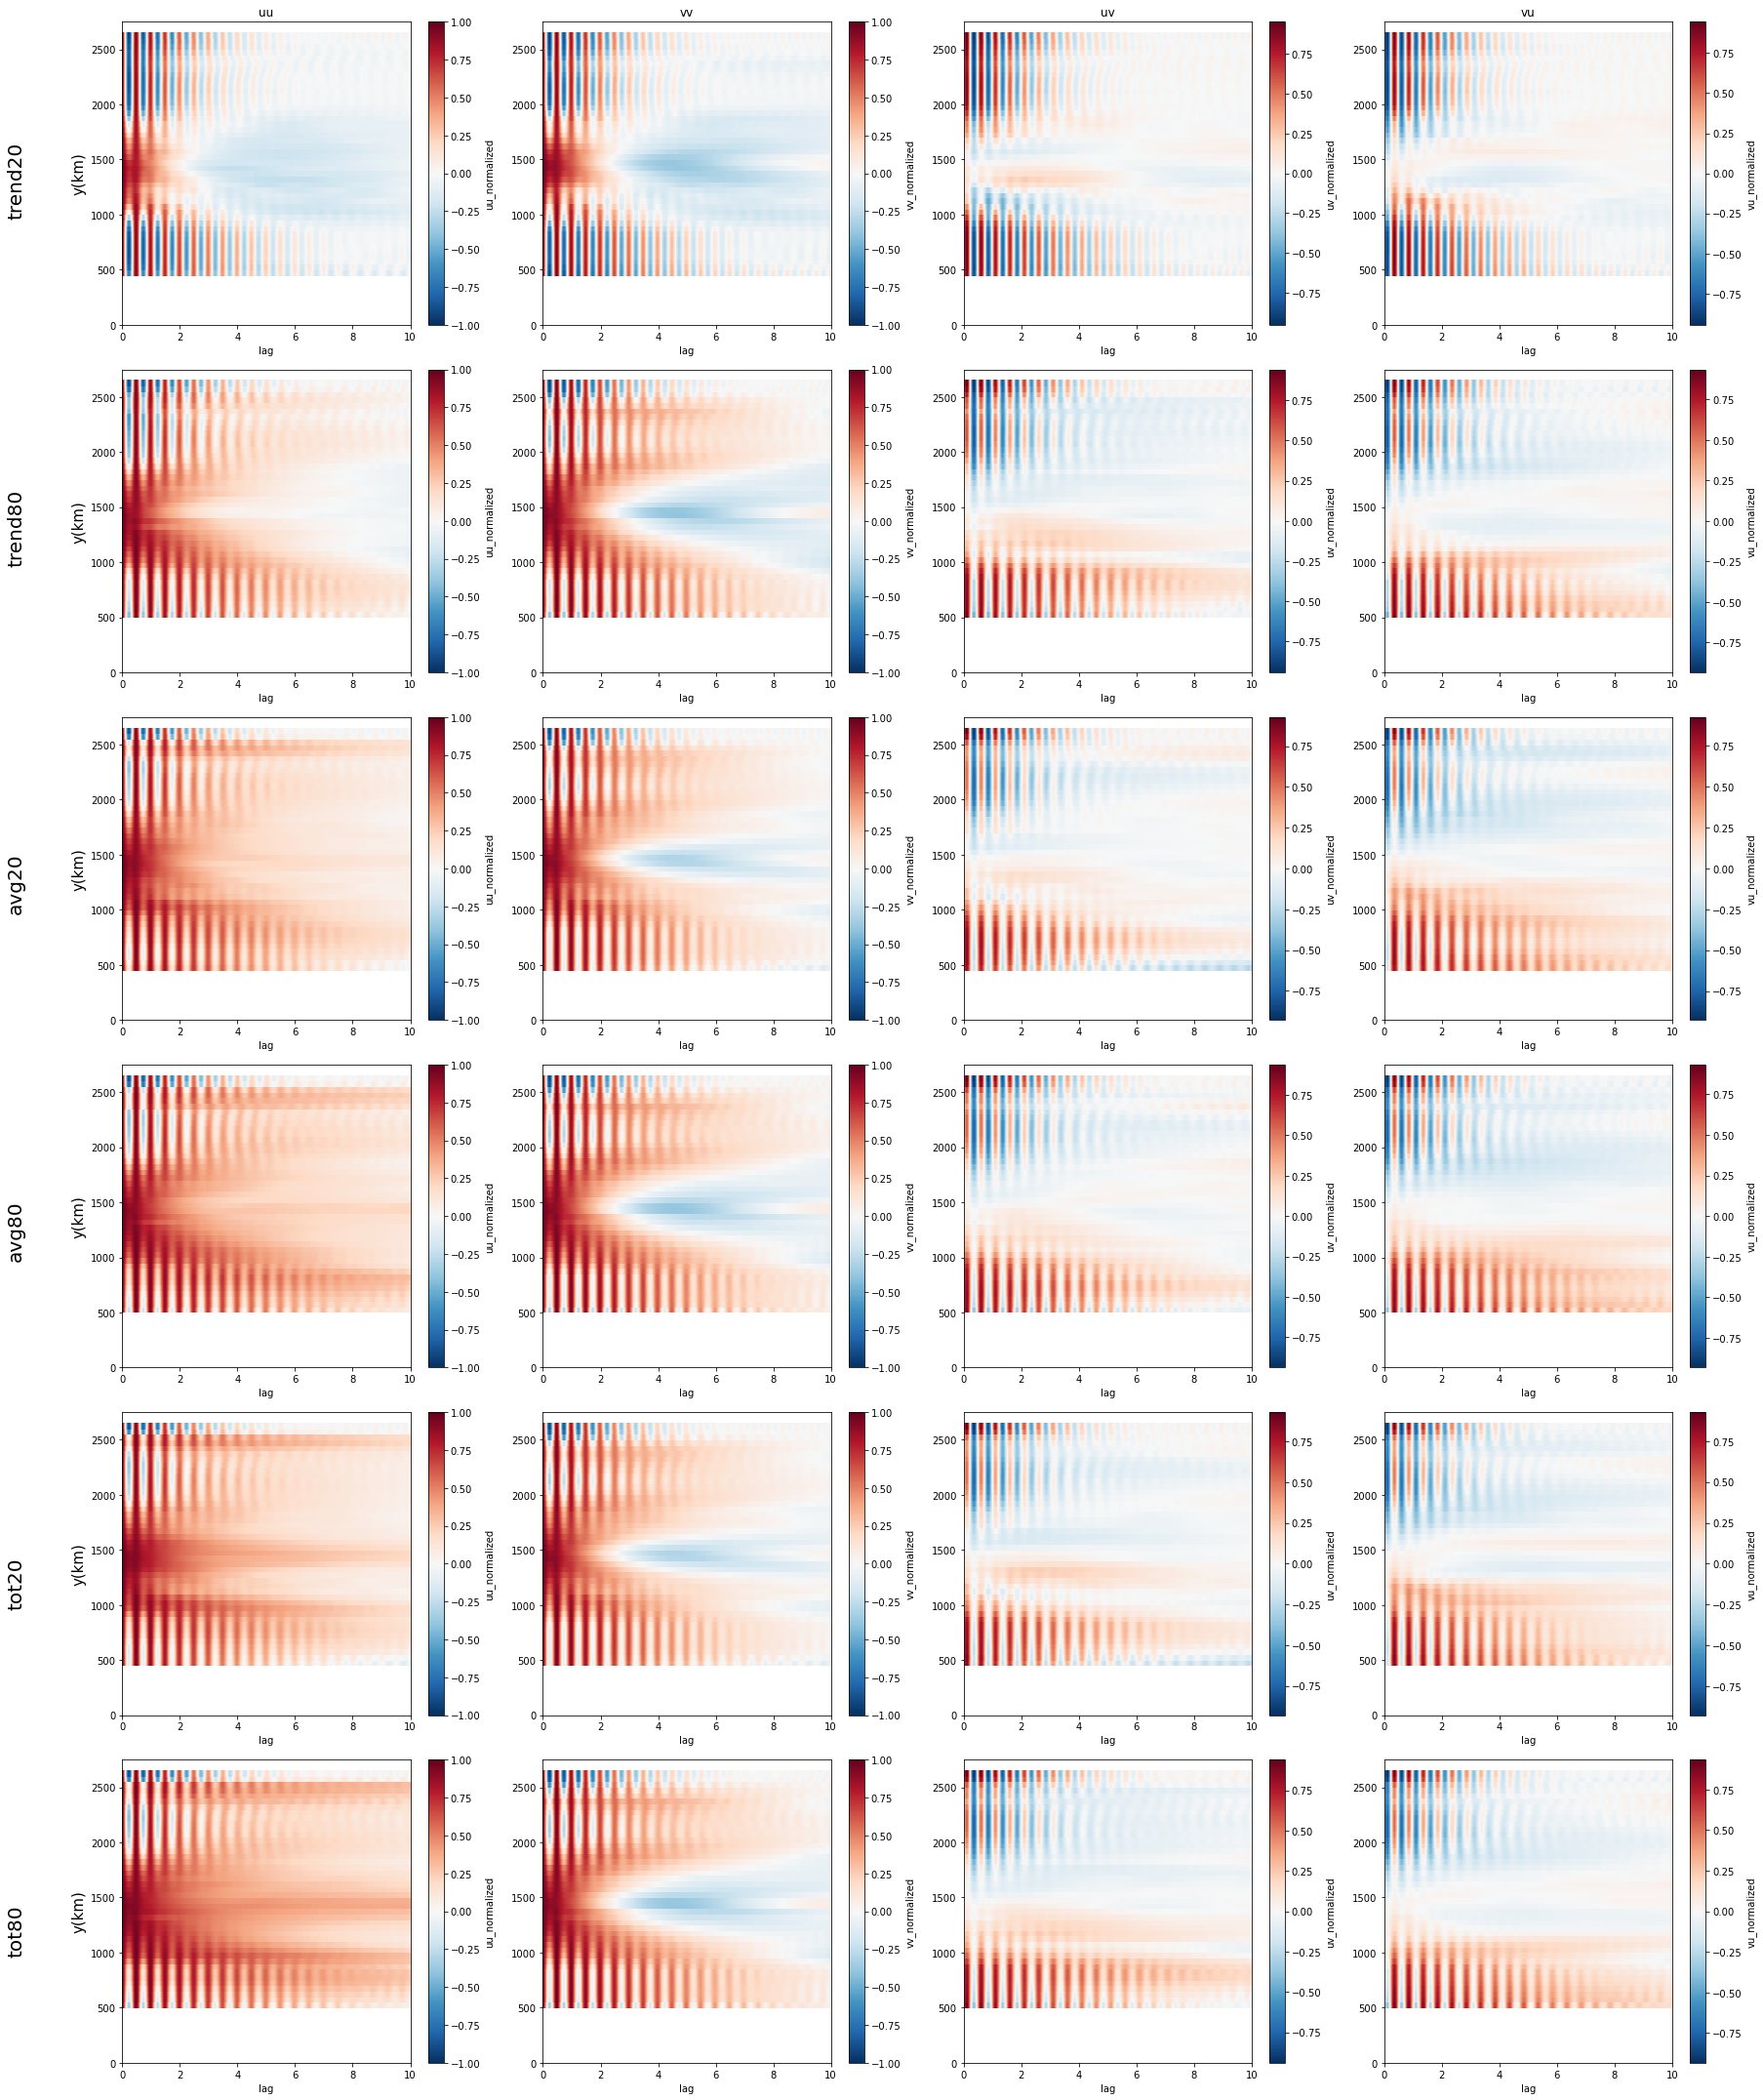

In [22]:
fig,axs = plt.subplots(len(['trend20','trend80','avg20','avg80','tot20','tot80']),4,figsize=(25,30))
for i,name in enumerate(['trend20','trend80','avg20','avg80','tot20','tot80']):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corrLT[name][V+'_normalized'].plot(ax=ax);ax.set_ylabel('');ax.set_xlim(0,10)
    axs[i,0].text(-4,1000,name,fontsize=20,rotation=90);axs[i,0].set_ylabel('y(km)',fontsize=15)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

### Comments : 
The detrending on larger time window seem to give results closer to the ones obtained with the avg. The negative lobe seems to remain but significantly decreased in uu.\
The negative lobe in vv is observed in all cases but in a narrower band of y for a larger T in the detrending and in both avg cases.\
For vv both autocorrelations for T=80d seem similar(for both detrending and avg)\
When the full signal is taken into account, the differences between

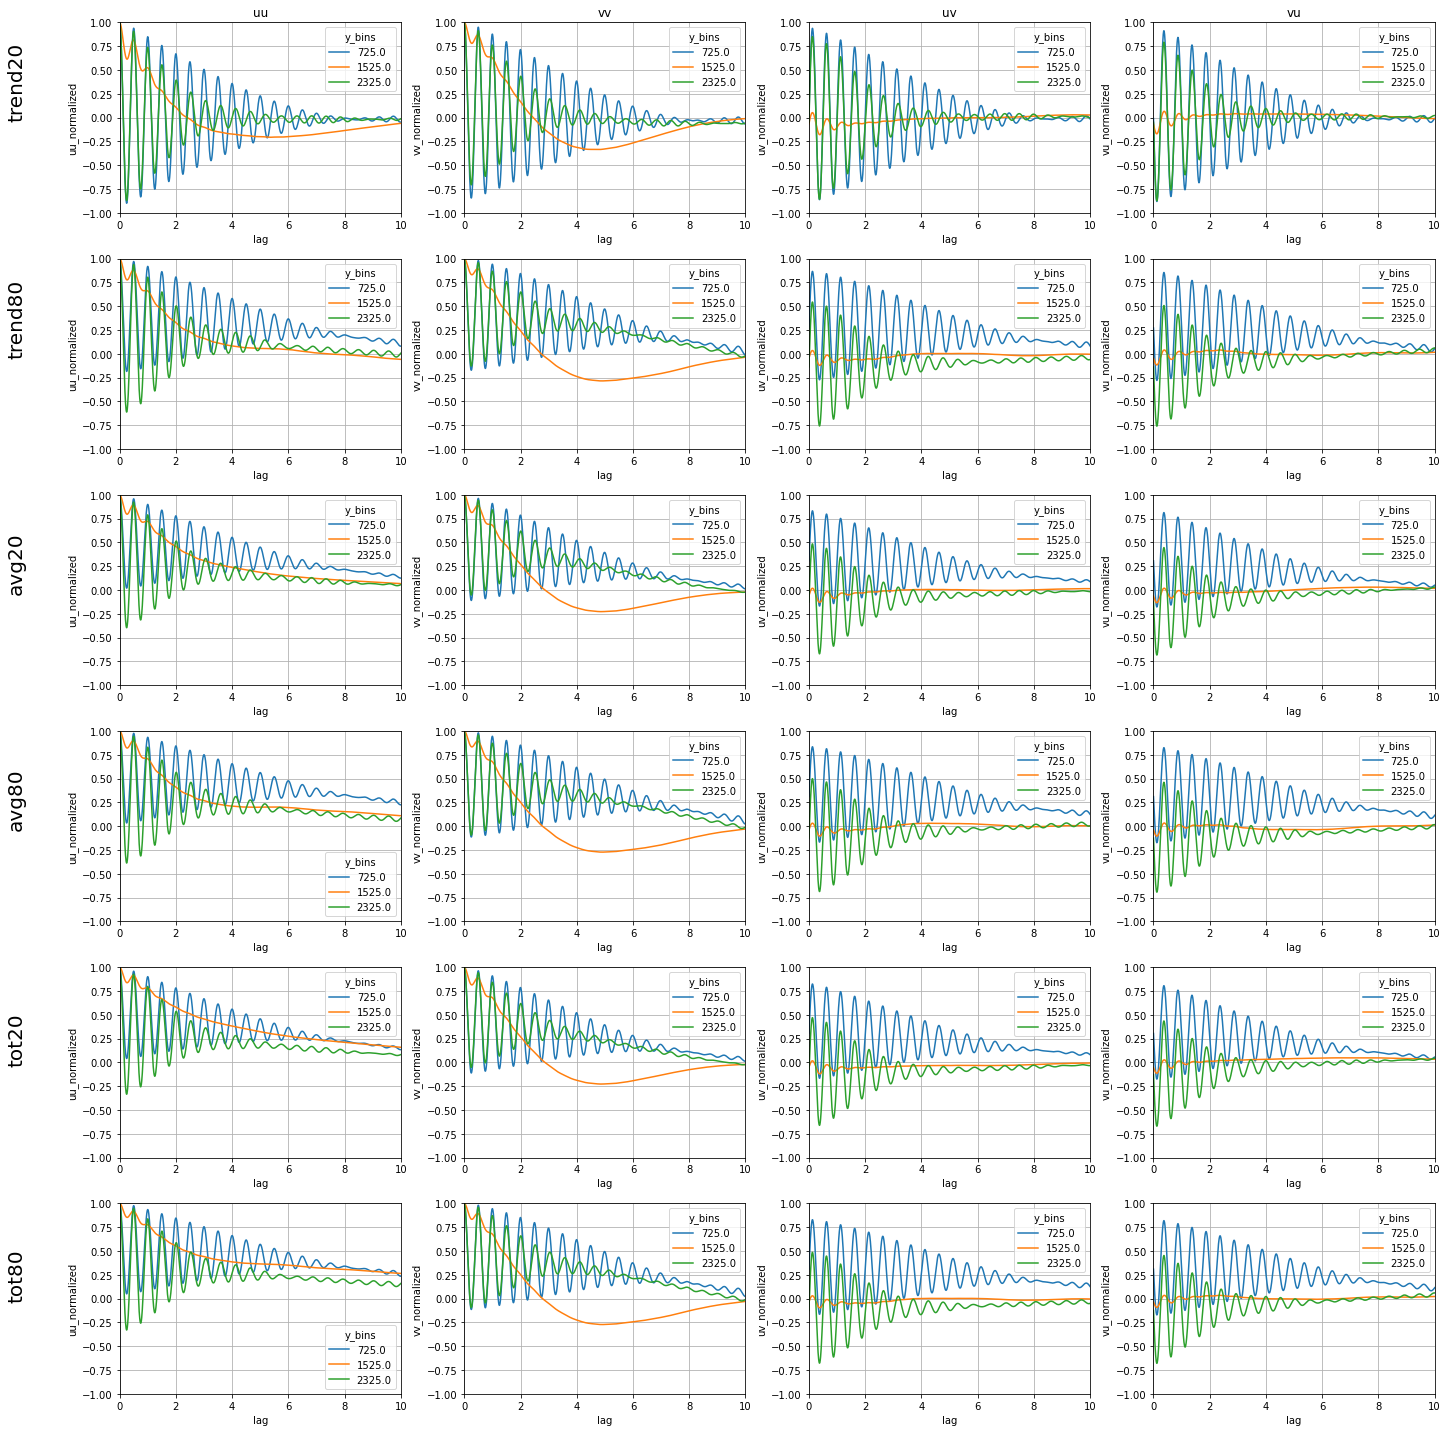

In [23]:
Y=[700,1500,2300]
fig,axs = plt.subplots(len(['trend20','trend80','avg20','avg80','tot20','tot80']),4,figsize=(20,20))
for i,name in enumerate(['trend20','trend80','avg20','avg80','tot20','tot80']):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corrT[name][V+'_normalized'].sel(y_bins=Y,method='nearest').plot(ax=ax, x='lag', hue='y_bins')
        ax.set_xlim(0,10);ax.set_ylim(-1,1);ax.grid()
    axs[i,0].text(-4,0,name,fontsize=20,rotation=90)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

### Comments : 
Detrending (T=20 and T=80, 1st 2 lines) : \
uu : in three areas, the fast oscillations have smaller amplitudes for T=80. For T=80, uu in the jet becommes negative for $\tau$<8 and there seems to a sharp change of slope around $\tau\simeq$6days. vv presents a more pronounced negative lobe (min<-0.25).

Avg (T=20 and T=80, last 2 lines) : \
Amplitudes of fast oscillations seem to remain unchanged by the increase of the time window. The time decorrelation in the South also seems to be the same. In the jet, same change of the slope in uu and decrease of the negative lobe in vv than the ones described previously, however no negative values (for $\tau$<10) of uu in this case. 

General comments : a larger time window allows more marks of the slow motion to be visible in the detrended case. The rate of amplitude of the slow component seem higher for the large time window with very similar form in the jet in both detrended and removed avg cases.\ In South, the tree last lines shows similar decorrelation timescales but higher amplitudes of fast oscillations in the detrended case (detrend+T=80, max ampl$\simeq$1.15 vs max ampl$\simeq$1 for both last cases).\
Time windows size => ratio slow component/fast component\
detrend/avg removal (for time windows large enough) => amplitudes of fast oscillations

### Eulerian

In [49]:
corrET = {}
for name,data in zip(['trend20','trend80','avg20','avg80','tot20','tot80'],
                     ['Eulerian_corr_20d_ZC.nc','Eulerian_corr_80d_ZC.nc','Eulerian_corr_20avg1d_ZC.nc',
                      'Eulerian_corr_80avg1d_ZC.nc','Eulerian_corr_20total_ZC.nc','Eulerian_corr_80total_ZC.nc']):
    corrET[name] = xr.open_dataset(path+data)
    for v in ['uu', 'vv']:
        corrET[name][v+'_normalized'] = corrET[name][v]/corrET[name][v].sel(lags=0)
    for v in ['uv', 'vu']:
        corrET[name][v+'_normalized'] = corrET[name][v]/np.sqrt(corrET[name]['uu'].sel(lags=0)*corrET[name]['vv'].sel(lags=0))

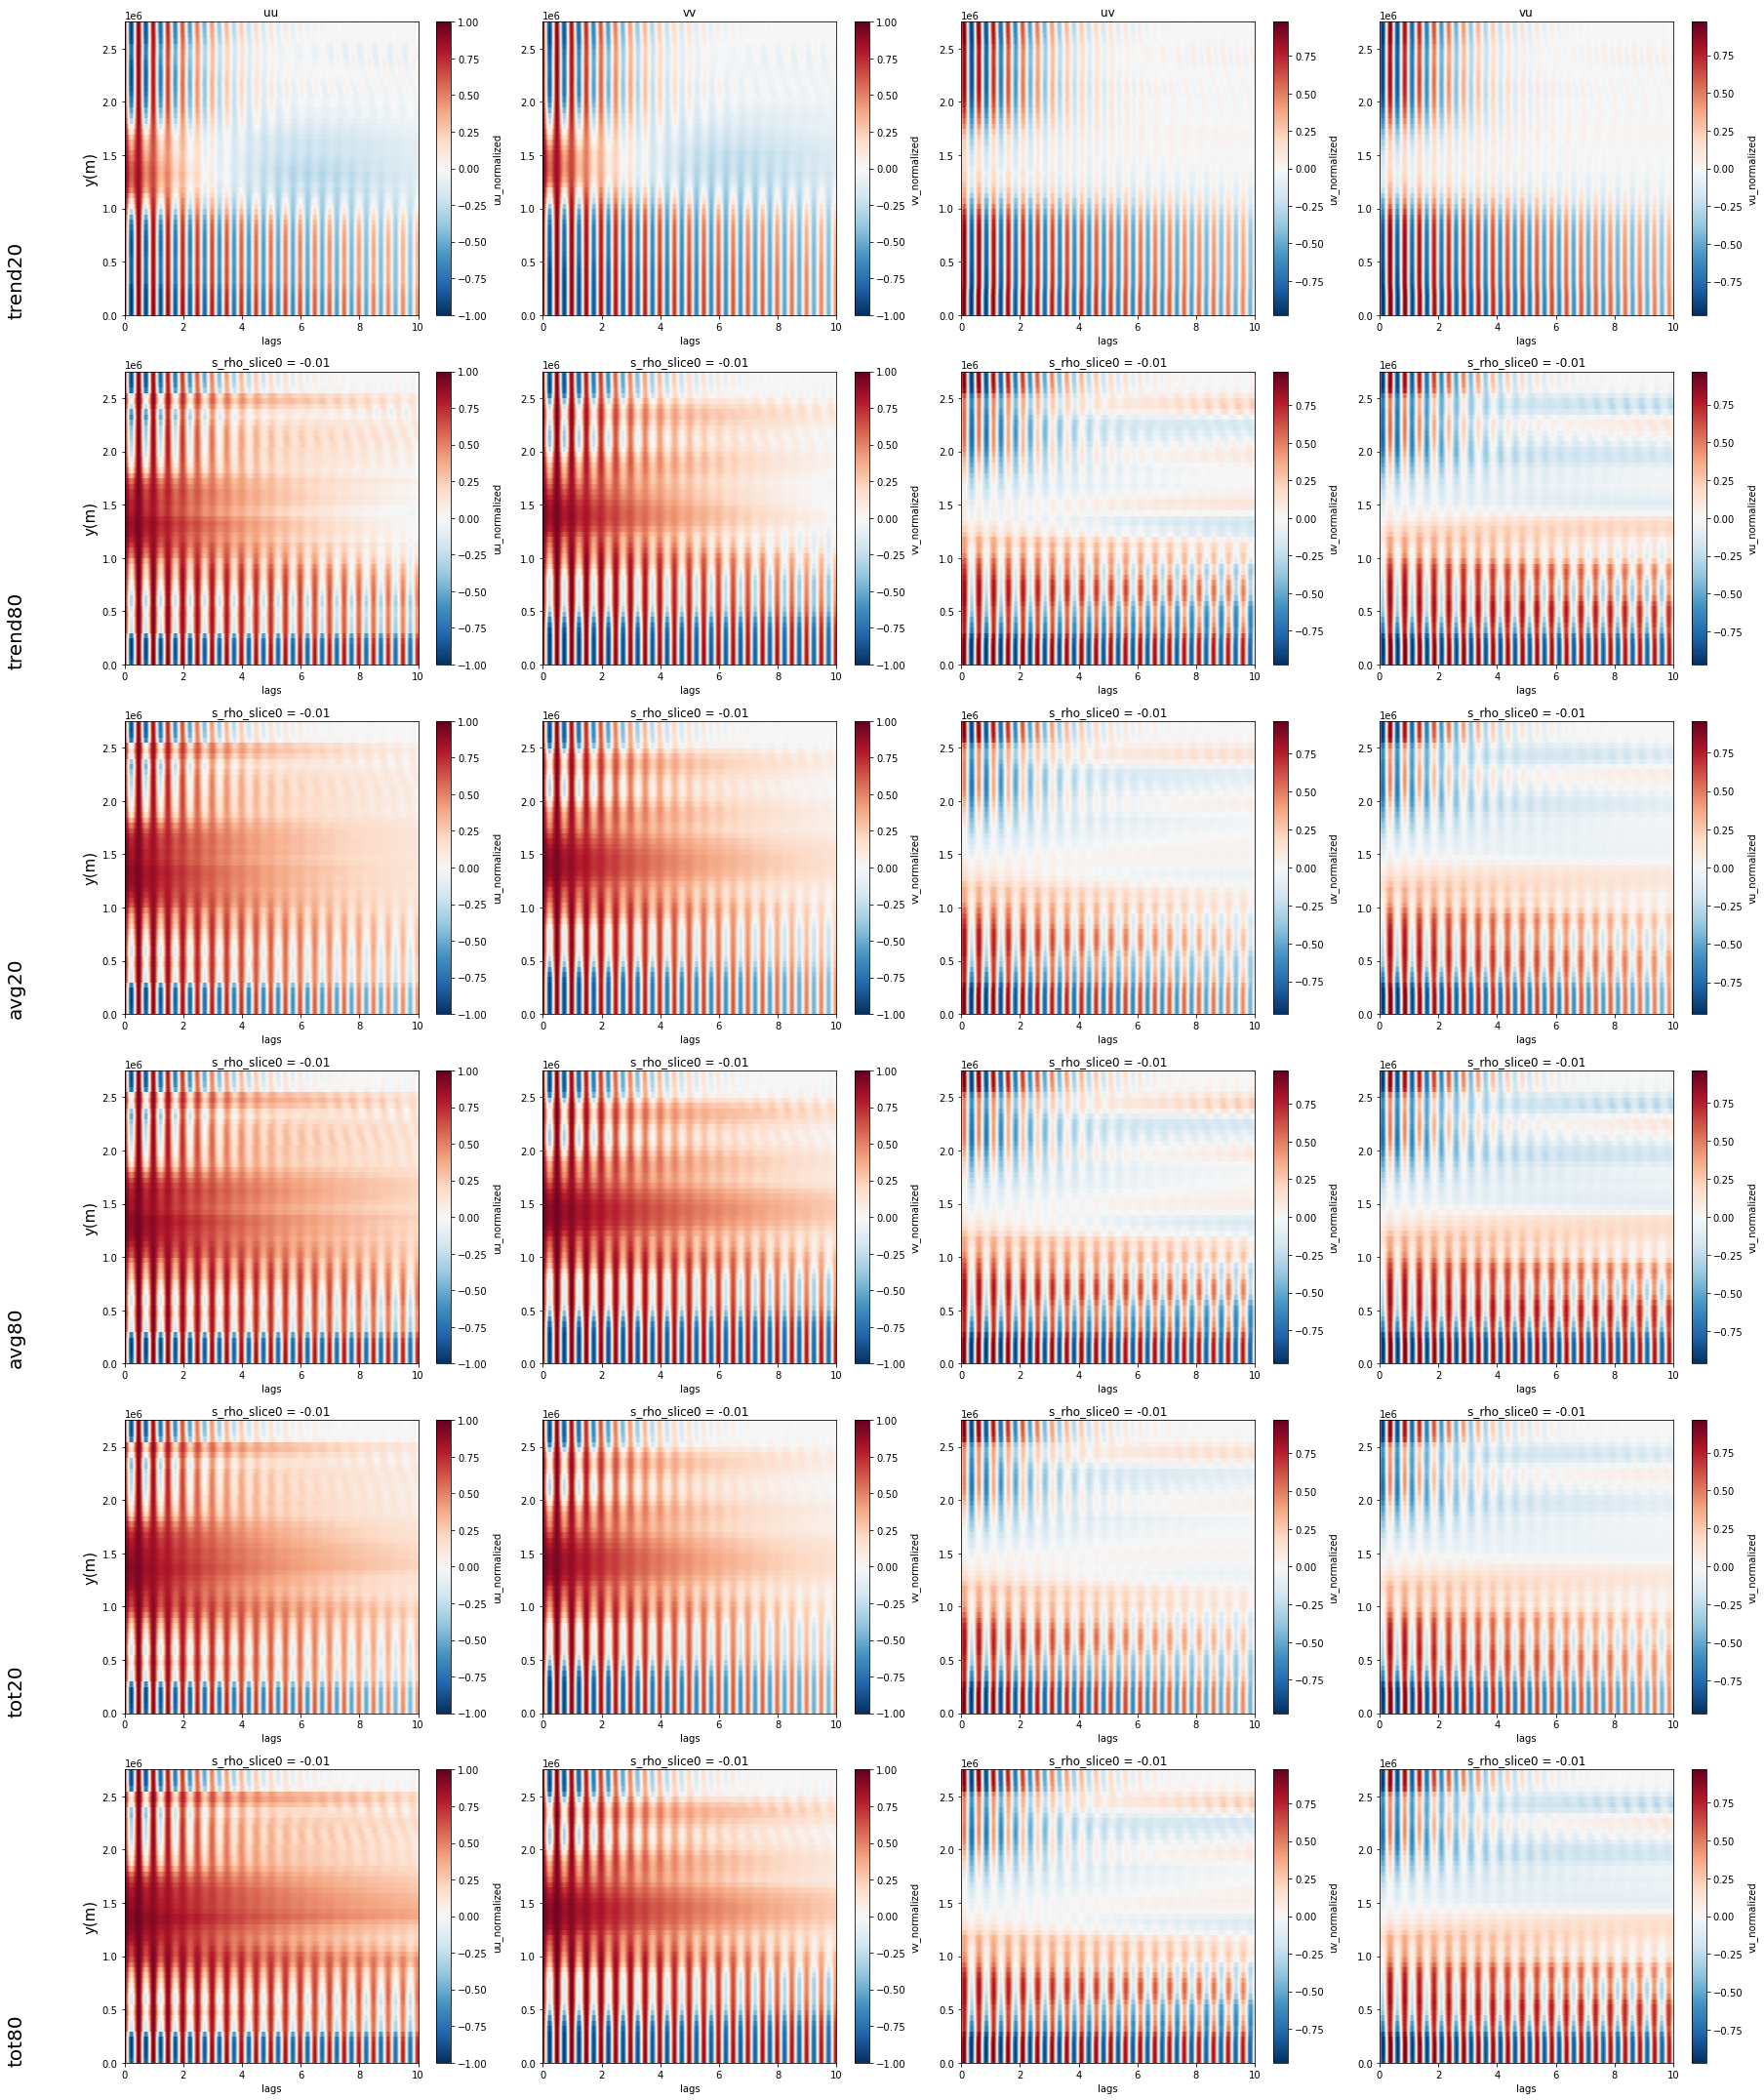

In [51]:
fig,axs = plt.subplots(len(['trend20','trend80','avg20','avg80','tot20','tot80']),4,figsize=(25,30))
for i,name in enumerate(['trend20','trend80','avg20','avg80','tot20','tot80']):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corrET[name][V+'_normalized'].plot(ax=ax);ax.set_ylabel('');ax.set_xlim(0,10)
    axs[i,0].text(-4,1000,name,fontsize=20,rotation=90);axs[i,0].set_ylabel('y(m)',fontsize=15)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

### Comments : 
Detrending (lines 1 and 2) : the negative lobe seen for T=20 days in uu and vv almost dispapeared for T=80 days\
Avg : More of the slow signal seems to be represented in the jet area but no large difference\
Total : Same remarks than for avg

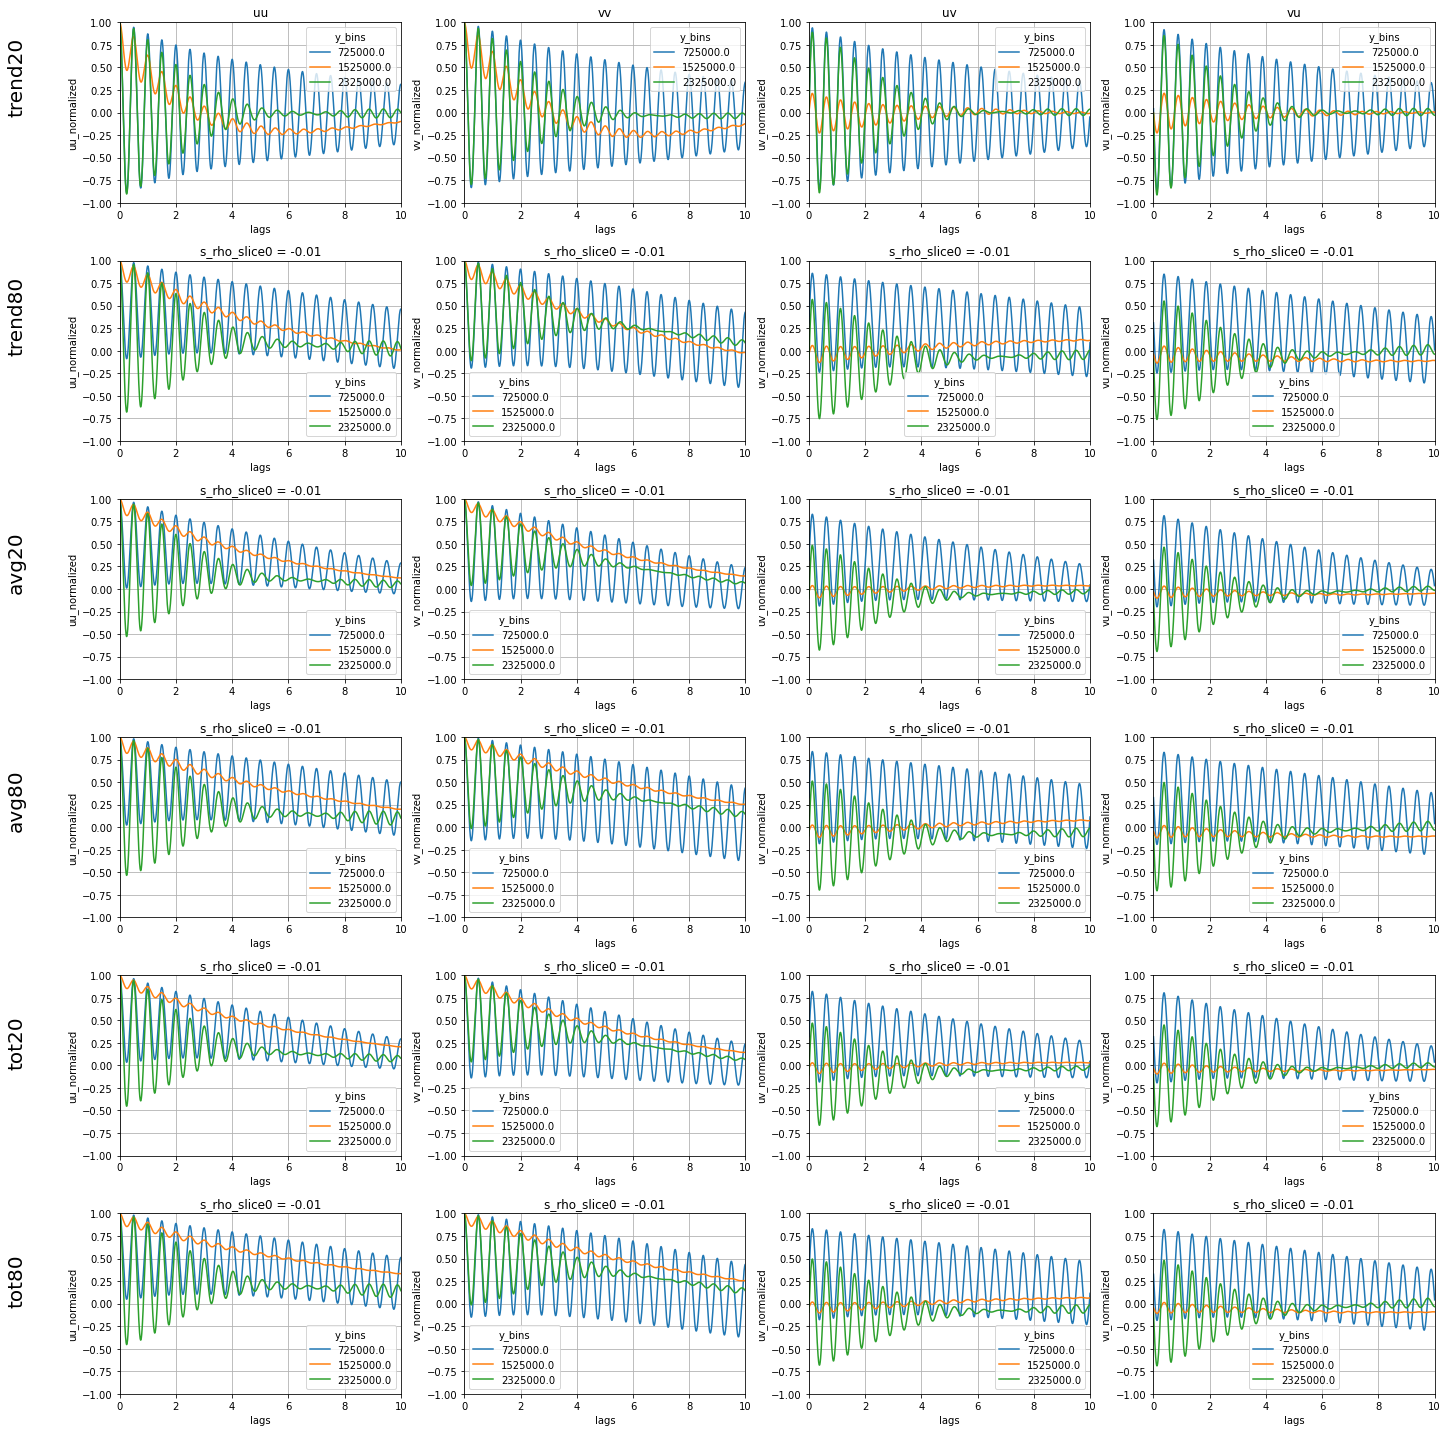

In [53]:
Y=[700*1e3,1500*1e3,2300*1e3]
fig,axs = plt.subplots(len(['trend20','trend80','avg20','avg80','tot20','tot80']),4,figsize=(20,20))
for i,name in enumerate(['trend20','trend80','avg20','avg80','tot20','tot80']):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corrET[name][V+'_normalized'].sel(y_bins=Y,method='nearest').plot(ax=ax, x='lags', hue='y_bins')
        ax.set_xlim(0,10);ax.set_ylim(-1,1);ax.grid()
    axs[i,0].text(-4,0,name,fontsize=20,rotation=90)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

### Comments

Previous comments seems to be confirmed. Negative lobes are not observed in the jet for T=80 days. However the rate of decay of the fast oscillations does not seem to change for T=80d.
For the other cases, we note of larger amplitude of the fast oscillations in the areas outside the jet for T=80 days


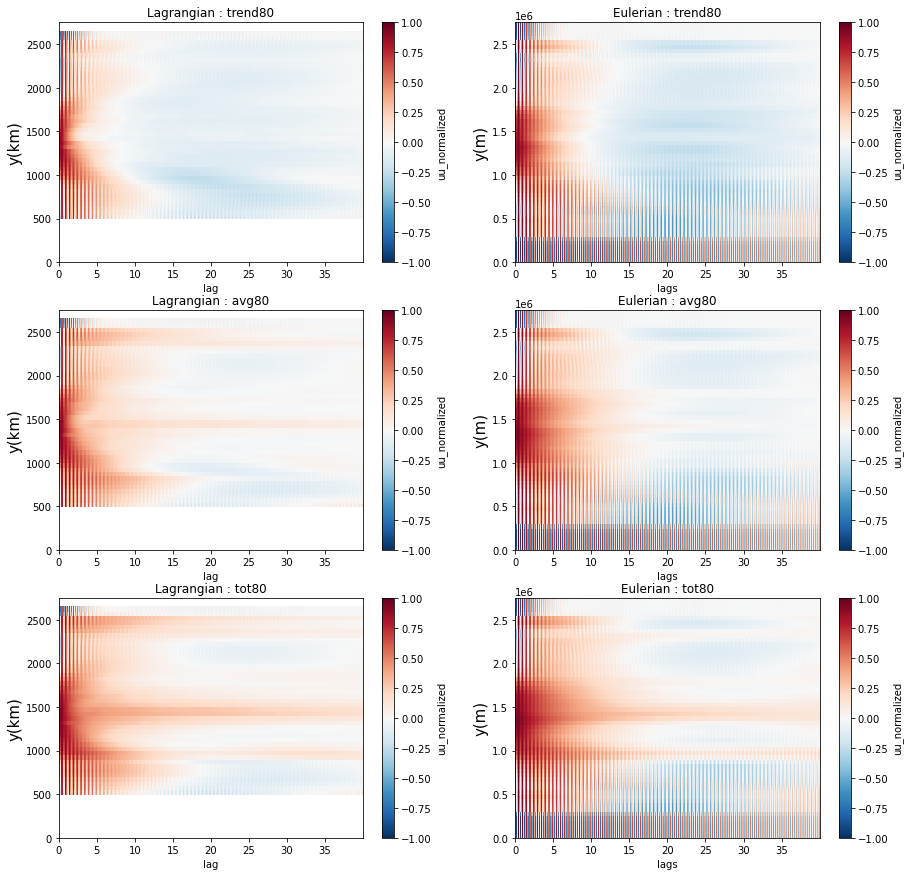

In [55]:
fig,ax = plt.subplots(3,2,figsize=(15,15))
for V,i in zip(['trend80','avg80','tot80'],range(3)):
    corrLT[V]['uu_normalized'].plot(ax=ax[i,0]);ax[i,0].set_ylabel('')
    corrET[V]['uu_normalized'].plot(ax=ax[i,1]);ax[i,1].set_ylabel('')
 #   [ax[i,0].axvline(x,linestyle='--',color='k',linewidth=1) for x in np.arange(0,10,0.5)]
    ax[i,0].set_title('Lagrangian : '+V);ax[i,0].set_ylabel('y(km)',fontsize=15)
#    [ax[i,1].axvline(x,linestyle='--',color='k',linewidth=1) for x in np.arange(0,10,0.5)]
    ax[i,1].set_title('Eulerian : '+V);ax[i,1].set_ylabel('y(m)',fontsize=15)

### Comments : 
This time we compare lagrangian and eulerian autocorrelation of uu for T=80 days.\
The exponential decay in lagrangian is clearly faster in the jet area than in the eulerian ($\sim$4days vs $\sim$8-10days)\

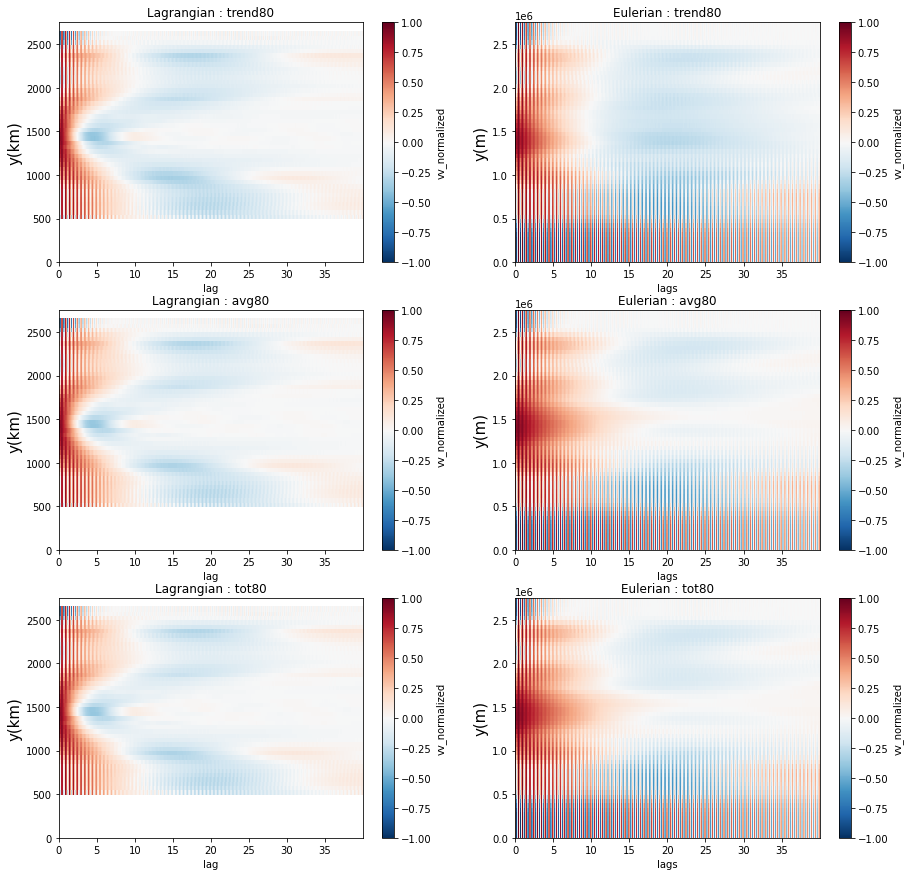

In [56]:
fig,ax = plt.subplots(3,2,figsize=(15,15))
for V,i in zip(['trend80','avg80','tot80'],range(3)):
    corrLT[V]['vv_normalized'].plot(ax=ax[i,0]);ax[i,0].set_ylabel('')
    corrET[V]['vv_normalized'].plot(ax=ax[i,1]);ax[i,1].set_ylabel('')
    ax[i,0].set_title('Lagrangian : '+V);ax[i,0].set_ylabel('y(km)',fontsize=15)
    ax[i,1].set_title('Eulerian : '+V);ax[i,1].set_ylabel('y(m)',fontsize=15)

### Comments : 
We notice again that the lagrangian and eulerian autocorrelation of v are very different.\
Negative values are reached between 1à and 15 days in eulerian when it takes less than 4 days in lagrangian.

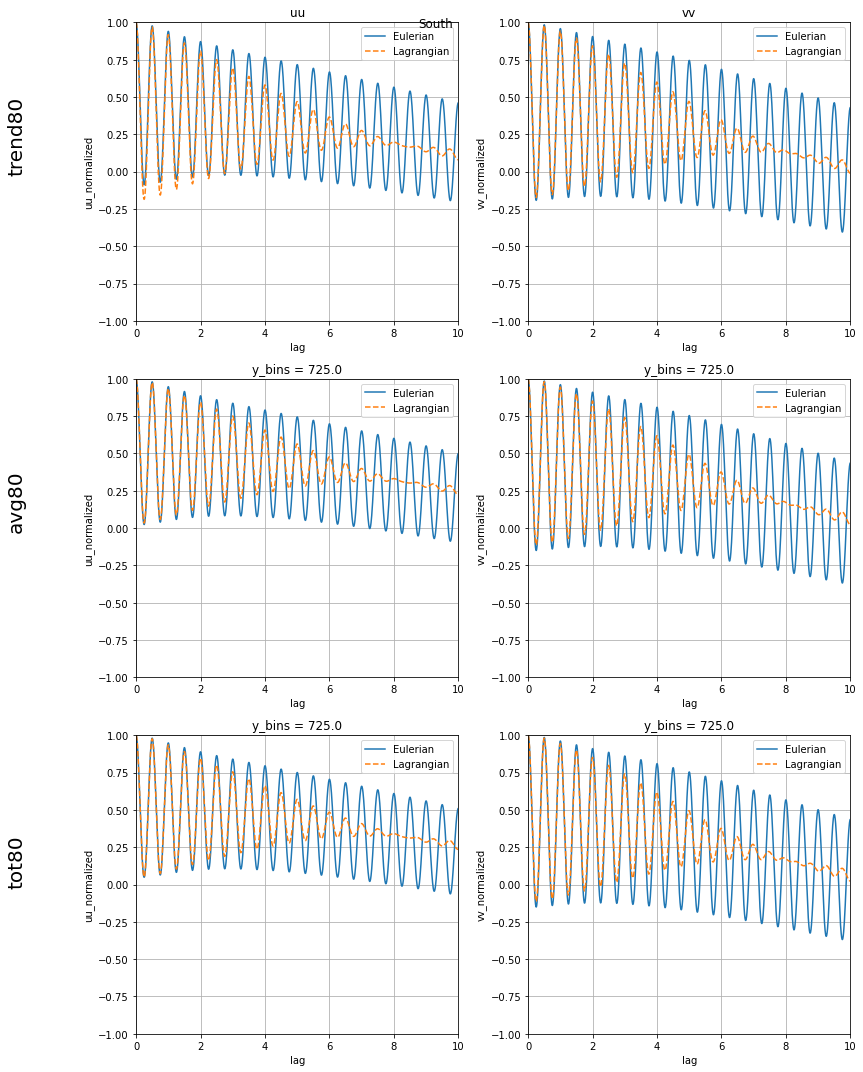

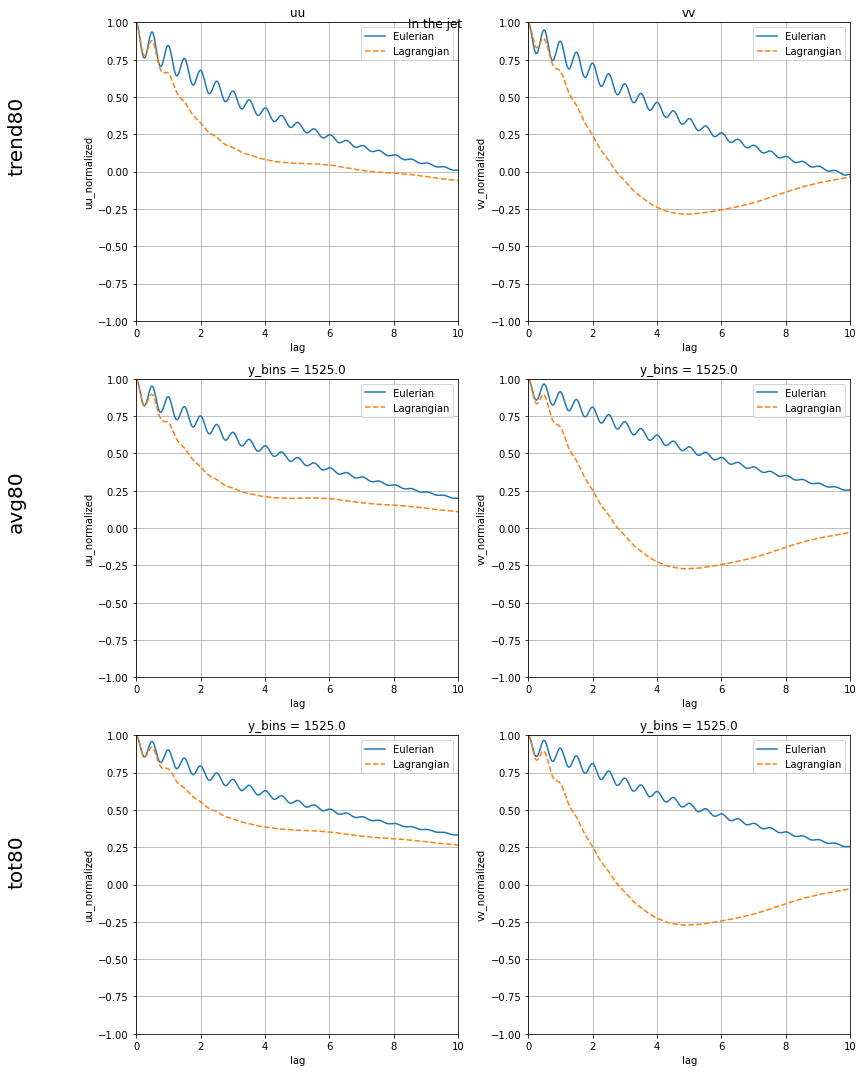

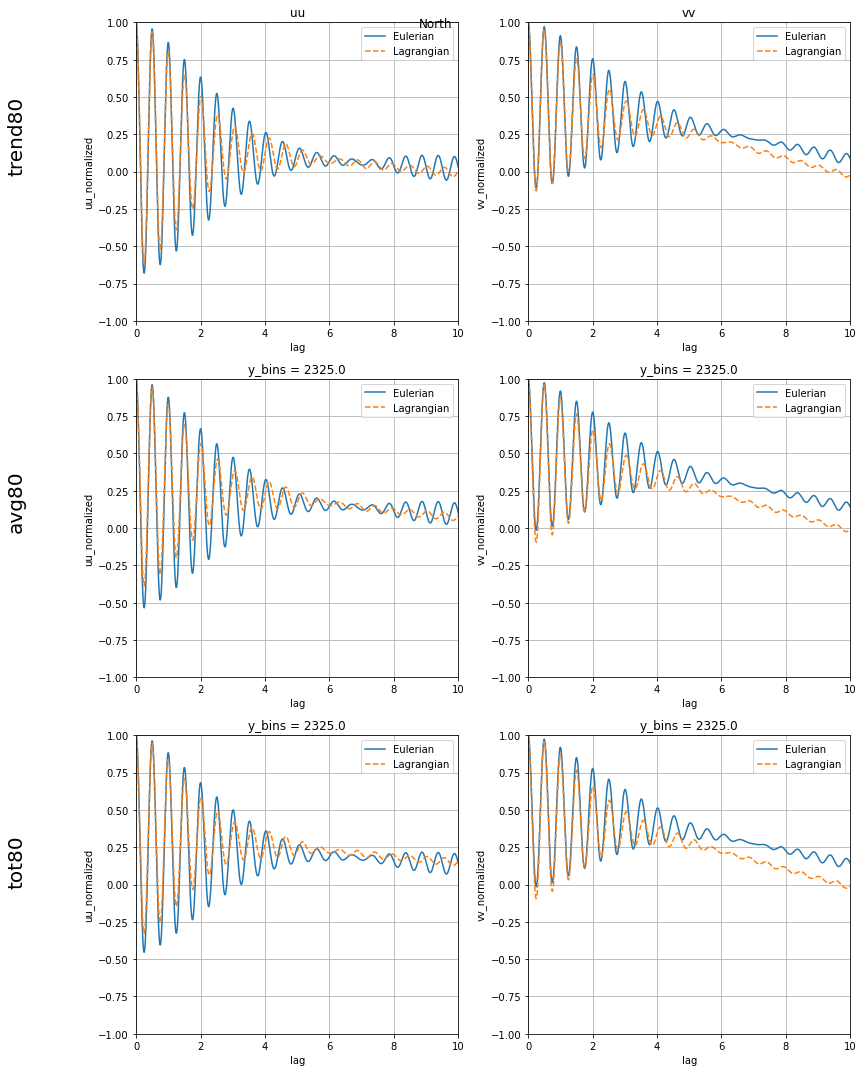

In [59]:

Y=[700*1e3,1500*1e3,2300*1e3]
for y,title in zip(Y,['South','In the jet','North']):
    fig,axs = plt.subplots(len(['trend80','avg80','tot80']),2,figsize=(12,15))
    for i,name in enumerate(['trend80','avg80','tot80']):
        for V,ax in zip(['uu','vv'],axs[i,:]):
            corrET[name][V+'_normalized'].sel(y_bins=y,method='nearest').plot(ax=ax,label=('Eulerian'))
            corrLT[name][V+'_normalized'].sel(y_bins=y*1e-3,method='nearest').plot(linestyle='--',ax=ax,label=('Lagrangian'))
            ax.set_xlim(0,10);ax.set_ylim(-1,1);ax.grid();ax.legend()
        axs[i,0].text(-4,0,name,fontsize=20,rotation=90)
    axs[0,0].set_title('uu');axs[0,1].set_title('vv')#;axs[0,2].set_title('uv');axs[0,3].set_title('vu')
    fig.tight_layout();fig.suptitle(title)

